<a href="https://colab.research.google.com/github/vatsalagarwal09/GenAI/blob/main/Build_Financial_Analyst_ReAct_Agentic_System_with_LangChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a Financial Analyst ReAct Agentic AI System with LangChain

### Building a Financial Analyst ReAct Agentic AI System

In this project, we will design a **Financial Analyst ReAct Agentic AI System** to assist investors by providing accurate and up-to-date stock market insights. This system will leverage the `create_react_agent` function from **LangGraph**. The workflow comprises the following components:

1. **Agent System Prompt**: The agent is designed to:
   - Validate input queries to ensure they are relevant and specific.
   - Provide detailed market analysis or individual stock insights depending on the user's query.
   - For invalid queries, respond professionally and guide the user appropriately.
   - Deliver concise, accurate, and professional responses while emphasizing data accuracy.

   **Flows**:
   - **Flow 1**: For general market queries, use tools to analyze trends and suggest stock opportunities.
   - **Flow 2**: For stock-specific queries, validate the ticker, retrieve data, and provide insights.

2. **Financial Analysis Tools**: The system utilizes the following tools to interact with stock market data:
   - **GET_STOCK_TICKER**: Validates and fetches stock tickers based on user queries.
   - **GET_STOCK_PRICE_METRICS**: Retrieves price trends and metrics for specific stocks.
   - **GET_STOCK_NEWS**: Extracts recent news articles related to stocks or markets.
   - **GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS**: Provides insights into financial indicators like P/E ratio, ROE, etc.
   - **GET_GENERAL_MARKET_DATA**: Fetches general market trends and data.

3. **Stock Market Data Providers**: The system integrates with data providers such as Yahoo Finance, Finviz, Cboe, and others through platforms like __OpenBB__ to ensure reliable and real-time information.

4. **ReAct Reasoning Framework**: The agent employs ReAct reasoning to combine logical deduction with dynamic tool usage, ensuring precise and actionable results.

5. **Final Response**: After processing the data, the agent delivers a well-structured response emphasizing clarity and encouraging users to verify any investment decisions.

By utilizing LangGraph's `create_react_agent` and integrating comprehensive financial data tools, this system empowers investors with actionable insights, enabling informed decision-making in the dynamic stock market environment.

![](https://i.imgur.com/ZbYjVIE.png)

## Install OpenAI, and LangChain and OpenBB dependencies

In [ ]:
!pip install langchain==0.3.14
!pip install langchain-openai==0.3.0
!pip install langchain-community==0.3.14
!pip install langgraph==0.2.66
!pip install yfinance==0.2.51

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install openbb[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 6.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of poetry-plugin-export to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━

## Enter Open AI API Key

In [ ]:
from getpass import getpass

OPENAI_KEY = getpass('Enter Open AI API Key: ')

Enter Open AI API Key: ··········


## Enter OpenBB Personal Access Token

In [ ]:
from getpass import getpass

OPENBB_PAT = getpass('Enter OpenBB Personal Access Token (PAT): ')

Enter OpenBB Personal Access Token (PAT): ··········


## Setup Environment Variables

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [ ]:
from openbb import obb
# takes 1 min to setup everything
obb.account.login(pat=OPENBB_PAT)

Extensions to add: alpha_vantage@1.3.5, biztoc@1.3.5, cboe@1.3.5, ecb@1.3.5, econometrics@1.4.5, finra@1.3.5, finviz@1.2.5, government_us@1.3.5, multpl@1.0.5, nasdaq@1.3.5, openbb_charting@2.2.5, quantitative@1.3.5, seeking_alpha@1.3.5, stockgrid@1.3.5, technical@1.3.5, tmx@1.2.5, tradier@1.2.5, wsj@1.3.5

Building...


## Create Financial Data Retrieval Tools

We will create custom tools as following which can be used by our Agentic AI System to interact with stock market data:

   - **GET_STOCK_TICKER**: Validates and fetches stock tickers based on user queries.
   - **GET_STOCK_PRICE_METRICS**: Retrieves price trends and metrics for specific stocks.
   - **GET_STOCK_NEWS**: Extracts recent news articles related to stocks or markets.
   - **GET_STOCK_FUNDAMENTAL_INDICATOR_METRICS**: Provides insights into financial indicators like P/E ratio, ROE, etc.
   - **GET_GENERAL_MARKET_DATA**: Fetches general market trends and data.

   
![](https://i.imgur.com/C9Ay1kv.png)

Refer to the comprehensive [OpenBB Documentation](https://docs.openbb.co/platform/reference) for understanding the specific functions used below in more detail.


In [ ]:
from langchain_core.tools import tool
from datetime import datetime, timedelta

@tool
def get_stock_ticker_symbol(stock_name: str) -> str:
    """Get the symbol, name and CIK for any publicly traded company"""
    # Use OpenBB to search for stock ticker symbol and company details by name.
    # The provider "sec" fetches data from the U.S. Securities and Exchange Commission (SEC).
    res = obb.equity.search(stock_name, provider="sec")

    # Convert the result to a DataFrame and format it as markdown for readability.
    stock_ticker_details = res.to_df().to_markdown()

    # Prepare the output with the stock details.
    output = """Here are the details of the company and its stock ticker symbol:\n\n""" + stock_ticker_details
    return output

@tool
def get_stock_price_metrics(stock_ticker: str) -> str:
    """Get historical stock price data, stock price quote and price performance data
       like price changes for a specific stock ticker"""

    # Fetch the latest stock price quote using "cboe" provider.
    res = obb.equity.price.quote(stock_ticker, provider='cboe')
    price_quote = res.to_df().to_markdown()

    # Retrieve stock price performance metrics (e.g., percentage change) using "finviz" provider.
    res = obb.equity.price.performance(symbol=stock_ticker, provider='finviz')
    price_performance = res.to_df().to_markdown()

    # Fetch historical price data for the past year using "yfinance" provider.
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=365)).strftime("%Y-%m-%d")
    res = obb.equity.price.historical(symbol=stock_ticker, start_date=start_date,
                                      interval='1d', provider='yfinance')
    price_historical = res.to_df().to_markdown()

    # Combine the results into a formatted output.
    output = ("""Here are the stock price metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Price Quote Metrics:\n\n" + price_quote +
              "\n\nPrice Performance Metrics:\n\n" + price_performance +
              "\n\nPrice Historical Data:\n\n" + price_historical)
    return output

@tool
def get_stock_fundamental_indicator_metrics(stock_ticker: str) -> str:
    """Get fundamental indicator metrics for a specific stock ticker"""

    # Retrieve fundamental financial ratios (e.g., P/E ratio, ROE) using "fmp" provider.
    res = obb.equity.fundamental.ratios(symbol=stock_ticker, period='annual',
                                        limit=10, provider='fmp')
    fundamental_ratios = res.to_df().to_markdown()

    # Fetch additional fundamental metrics (e.g., EBITDA, revenue growth) using "yfinance" provider.
    res = obb.equity.fundamental.metrics(symbol=stock_ticker, period='annual',
                                        limit=10, provider='yfinance')
    fundamental_metrics = res.to_df().to_markdown()

    # Combine fundamental ratios and metrics into a single output.
    output = ("""Here are the fundamental indicator metrics and data for the stock ticker symbol """ + stock_ticker + """: \n\n""" +
              "Fundamental Ratios:\n\n" + fundamental_ratios +
              "\n\nFundamental Metrics:\n\n" + fundamental_metrics)
    return output

@tool
def get_stock_news(stock_ticker: str) -> str:
    """Get news article headlines for a specific stock ticker"""

    # Define the date range to fetch news (last 45 days).
    end_date = datetime.now()
    start_date = (end_date - timedelta(days=45)).strftime("%Y-%m-%d")

    # Retrieve news headlines for the stock using "tmx" provider.
    res = obb.news.company(symbol=stock_ticker, start_date=start_date, provider='tmx', limit=50)
    news = res.to_df()

    # Extract relevant columns (symbols and titles) and format as markdown.
    news = news[['symbols', 'title']].to_markdown()

    # Prepare the output with the news headlines.
    output = ("""Here are the recent news headlines for the stock ticker symbol """ + stock_ticker + """: \n\n""" + news)
    return output

@tool
def get_general_market_data() -> str:
    """Get general data and indicators for the whole stock market including,
       most actively traded stocks based on volume, top price gainers and top price losers.
       Useful when you want an overview of the market and what stocks to look at."""

    # Retrieve the most actively traded stocks using "yfinance" provider.
    res = obb.equity.discovery.active(sort='desc', provider='yfinance', limit=15)
    most_active_stocks = res.to_df().to_markdown()

    # Fetch the top price gainers using "yfinance" provider.
    res = obb.equity.discovery.gainers(sort='desc', provider='yfinance', limit=15)
    price_gainers = res.to_df().to_markdown()

    # Retrieve the top price losers using "yfinance" provider.
    res = obb.equity.discovery.losers(sort='desc', provider='yfinance', limit=15)
    price_losers = res.to_df().to_markdown()

    # Combine the market data into a single formatted output.
    output = ("""Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:\n\n""" +
              "Most actively traded stocks:\n\n" + most_active_stocks +
              "\n\nTop price gainers:\n\n" + price_gainers +
              "\n\nTop price losers:\n\n" + price_losers)
    return output


## Test Tools

In [ ]:
from IPython.display import display, Markdown

response = get_general_market_data.invoke({})
display(Markdown(response))

Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:

Most actively traded stocks:

|    | symbol   | name                          |   price |     change |   percent_change |    volume |    open |    high |     low |   previous_close |     ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   eps_forward |   pe_forward |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency   |
|---:|:---------|:------------------------------|--------:|-----------:|-----------------:|----------:|--------:|--------:|--------:|-----------------:|---------:|----------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|----------:|--------------:|-------------:|-----------------:|:-----------|:--------------------|:--------------------------|:-----------|
|  0 | NVDA     | NVIDIA Corporation            |  147.07 |  6.24001   |       0.0443088  | 234537243 | 144.75  | 147.79  | 143.67  |           140.83 | 139.673  | 121.024   |     153.13  |     60.573 |  3.60174e+12 |          2.449e+10   |        1.744 |       84.3291   |      2.53 |          4.12 |     35.6966  |       0          | NMS        | America/New_York    | 2025-02-26 16:00:00-05:00 | USD        |
|  1 | RGTI     | Rigetti Computing, Inc.       |   13.91 | -0.0699997 |      -0.00500713 | 166595914 |  14.085 |  14.4   |  12.76  |            13.98 |   7.375  |   2.61305 |      21.42  |      0.66  |  3.89548e+09 |          2.80049e+08 |        0.64  |       21.7344   |     -0.37 |         -0.33 |    -42.1515  |       0          | NCM        | America/New_York    | 2024-11-12 06:30:49-05:00 | USD        |
|  2 | LCID     | Lucid Group, Inc.             |    2.67 | -0.19      |      -0.0664335  |  81686936 |   2.83  |   2.84  |   2.67  |             2.86 |   2.5817 |   2.93133 |       4.43  |      1.93  |  8.04121e+09 |          3.01169e+09 |        1.148 |        2.32578  |     -1.33 |         -0.88 |     -3.03409 |       0          | NMS        | America/New_York    | 2025-02-25 16:00:00-05:00 | USD        |
|  3 | PLTR     | Palantir Technologies Inc.    |   76.87 |  3.8       |       0.052005   |  65699123 |  74.55  |  77.16  |  73.8   |            73.07 |  69.4954 |  39.4597  |      84.797 |     16.03  |  1.75111e+11 |          2.18065e+09 |        1.982 |       38.7841   |      0.2  |          0.47 |    163.553   |       0          | NMS        | America/New_York    | 2025-02-03 16:00:00-05:00 | USD        |
|  4 | F        | Ford Motor Company            |   10.03 | -0.400001  |      -0.038351   |  64731219 |  10.25  |  10.25  |  10.02  |            10.43 |  10.4148 |  11.3468  |      14.85  |      9.49  |  3.98621e+10 |          3.90344e+09 |       11.15  |        0.899552 |      0.88 |          1.75 |      5.73143 |       0.0575264  | NYQ        | America/New_York    | 2025-02-05 16:05:00-05:00 | USD        |
|  5 | SOUN     | SoundHound AI, Inc.           |   16.38 | -0.140001  |      -0.00847465 |  64567581 |  16.365 |  16.67  |  15.81  |            16.52 |  13.4931 |   6.96692 |      24.98  |      1.62  |  6.0565e+09  |          3.37015e+08 |        0.802 |       20.4239   |     -0.35 |         -0.2  |    -81.9     |       0          | NGM        | America/New_York    | 2024-11-12 16:08:00-05:00 | USD        |
|  6 | AAPL     | Apple Inc.                    |  223.83 |  1.19      |       0.00534496 |  62954541 | 219.94  | 223.98  | 219.8   |           222.64 | 239.303  | 217.556   |     260.1   |    164.08  |  3.36593e+12 |          1.50379e+10 |        3.767 |       59.4186   |      6.09 |          8.31 |     26.935   |       0.00440173 | NMS        | America/New_York    | 2025-01-30 16:00:00-05:00 | USD        |
|  7 | TSLA     | Tesla, Inc.                   |  415.11 | -8.96002   |      -0.0211286  |  60469479 | 416.72  | 428     | 414.59  |           424.07 | 387.2    | 254.04    |     488.54  |    138.8   |  1.33253e+12 |          3.21006e+09 |       21.806 |       19.0365   |      3.65 |          3.24 |    128.12    |       0          | NMS        | America/New_York    | 2025-01-29 16:00:00-05:00 | USD        |
|  8 | INTC     | Intel Corporation             |   21.86 |  0.0900002 |       0.00413414 |  60333032 |  21.725 |  22.285 |  21.58  |            21.77 |  21.796  |  25.9969  |      50.3   |     18.51  |  9.42822e+10 |          4.313e+09   |       23.099 |        0.946361 |     -3.74 |          0.97 |     22.5361  |       0.0227377  | NMS        | America/New_York    | 2025-01-30 19:00:00-05:00 | USD        |
|  9 | AAL      | American Airlines Group, Inc. |   18.66 |  0.0200005 |       0.00107299 |  57969559 |  19.05  |  19.1   |  18.37  |            18.64 |  16.283  |  13       |      19.1   |      9.07  |  1.22621e+10 |          6.57131e+08 |       -7.387 |       -2.52606  |      0.42 |          2.02 |      9.23762 |       0          | NMS        | America/New_York    | 2025-01-23 09:30:00-05:00 | USD        |
| 10 | NU       | Nu Holdings Ltd.              |   11.99 |  0.51      |       0.0444251  |  54703725 |  11.655 |  12.24  |  11.57  |            11.48 |  12.2832 |  12.7195  |      16.145 |      8.51  |  5.7631e+10  |          3.75513e+09 |        1.593 |        7.52668  |      0.38 |          0.62 |     19.3387  |       0          | NYQ        | America/New_York    | 2024-11-13 16:18:00-05:00 | USD        |
| 11 | VALE     | VALE S.A.                     |    8.87 | -0.11      |      -0.0122494  |  52561850 |   9.03  |   9.1   |   8.845 |             8.98 |   9.3772 |  10.799   |      14.27  |      8.38  |  3.82238e+10 |          4.26872e+09 |       48.853 |        0.181565 |      2.16 |          2.05 |      4.32683 |       0.305011   | NYQ        | America/New_York    | 2025-02-19 14:00:00-05:00 | USD        |
| 12 | SOFI     | SoFi Technologies, Inc.       |   17.59 | -0.309999  |      -0.0173184  |  50890371 |  18.05  |  18.05  |  17.27  |            17.9  |  15.1666 |   9.50682 |      18.1   |      6.01  |  1.90878e+10 |          1.08515e+09 |        5.646 |        3.11548  |      0.12 |          0.29 |     60.6552  |       0          | NMS        | America/New_York    | 2025-01-27 08:30:00-05:00 | USD        |
| 13 | SMCI     | Super Micro Computer, Inc.    |   33.86 |  1.41      |       0.0434515  |  45272184 |  33.97  |  34.98  |  32.7   |            32.45 |  32.27   |  58.1229  |     122.9   |     17.25  |  1.98272e+10 |          5.85565e+08 |        9.32  |        3.63305  |      2.01 |          4.24 |      7.98585 |       0          | NMS        | America/New_York    | 2024-11-05 16:15:00-05:00 | USD        |
| 14 | ORCL     | Oracle Corporation            |  184.22 | 11.65      |       0.0675088  |  44262303 | 191.51  | 191.99  | 180.57  |           172.57 | 176.396  | 150.429   |     198.31  |    106.51  |  5.15256e+11 |          2.79696e+09 |        3.159 |       58.3159   |      4.09 |          7.16 |     25.7291  |       0          | NYQ        | America/New_York    | 2024-12-09 17:00:00-05:00 | USD        |

Top price gainers:

|    | symbol   | name                            |   price |   change |   percent_change |   volume |    open |     high |      low |   previous_close |     ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   eps_forward |   pe_forward |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency   |
|---:|:---------|:--------------------------------|--------:|---------:|-----------------:|---------:|--------:|---------:|---------:|-----------------:|---------:|----------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|----------:|--------------:|-------------:|-----------------:|:-----------|:--------------------|:--------------------------|:-----------|
|  0 | ARM      | Arm Holdings plc                |  179.93 |    24.73 |        0.159343  | 27079463 | 160.13  | 182.88   | 159.95   |           155.2  | 138.661  | 136.483   |      188.75 |      69.32 |  1.89106e+11 |          1.051e+09   |        5.72  |     31.4563     |      0.61 |          2.06 |     87.3447  |       0          | NMS        | America/New_York    | 2025-02-05 16:00:00-05:00 | USD        |
|  1 | IESC     | IES Holdings, Inc.              |  316.26 |    39.94 |        0.144543  |   306035 | 284.63  | 318.66   | 284.63   |           276.32 | 252.872  | 186.458   |      320.08 |      80.86 |  6.32729e+09 |          2.00066e+07 |       28.255 |     11.1931     |      9.9  |        nan    |    nan       |       0          | NGM        | America/New_York    | 2024-11-22 07:45:00-05:00 | USD        |
|  2 | DSCSY    | Disco Corp.                     |   34.23 |     3.76 |        0.1234    |    55435 |  33.6   |  35.07   |  33.6    |            30.47 |  27.8221 |  30.8115  |       42.93 |      23.09 |  3.70933e+10 |          1.08365e+09 |     4025.6   |      0.00850309 |      0.62 |        nan    |    nan       |      14.1451     | PNK        | America/New_York    | 2025-01-23 02:00:00-05:00 | USD        |
|  3 | SFTBY    | Softbank Group Corp             |   34.1  |     3.48 |        0.113651  |  1074421 |  34.7   |  35      |  33.66   |            30.62 |  29.5676 |  29.2888  |       37.19 |      21.52 |  9.82847e+10 |          2.88225e+09 |     7293     |      0.00467571 |      4.75 |        nan    |    nan       |       1.43697    | PNK        | America/New_York    | 2025-02-12 01:00:00-05:00 | USD        |
|  4 | FTAI     | FTAI Aviation Ltd.              |   91.99 |     8.2  |        0.0978637 |  7448189 |  83.33  |  92.5182 |  81      |            83.79 | 149.148  | 115.979   |      181.64 |      51.03 |  9.43357e+09 |          1.0255e+08  |        1.154 |     79.714      |     -0.08 |          4.91 |     18.7352  |       0.0143215  | NMS        | America/New_York    | 2024-10-30 16:15:00-04:00 | USD        |
|  5 | NFLX     | Netflix, Inc.                   |  953.99 |    84.31 |        0.0969437 | 14001000 | 997.658 | 999      | 950.79   |           869.68 | 881.401  | 718.16    |      999    |     542.01 |  4.07791e+11 |          4.27458e+08 |       53.153 |     17.948      |     19.84 |         23.78 |     40.1173  |       0          | NMS        | America/New_York    | 2025-01-21 16:00:00-05:00 | USD        |
|  6 | OKLO     | Oklo Inc.                       |   34.17 |     2.92 |        0.0934399 | 23328835 |  32.43  |  34.95   |  32.03   |            31.25 |  22.7028 |  13.5251  |       34.95 |       5.35 |  4.67432e+09 |          1.36796e+08 |      -12.28  |     -2.78257    |     -0.12 |         -0.39 |    -87.6154  |       0          | NYQ        | America/New_York    | 2024-11-14 16:05:00-05:00 | USD        |
|  7 | TMDX     | TransMedics Group, Inc.         |   61.97 |     5.24 |        0.0923674 |  2426754 |  56.8   |  62.04   |  56.51   |            56.73 |  72.0777 | 119.722   |      177.37 |      55    |  2.07981e+09 |          3.35615e+07 |        6.255 |      9.90727    |      0.93 |          1.65 |     37.5576  |       0          | NGM        | America/New_York    | 2024-10-28 16:05:06-04:00 | USD        |
|  8 | RXRX     | Recursion Pharmaceuticals, Inc. |    7.49 |     0.61 |        0.0886627 | 34789724 |   7.17  |   8.05   |   7.17   |             6.88 |   6.9048 |   7.47673 |       15.74 |       5.6  |  2.92651e+09 |          3.83724e+08 |        1.833 |      4.0862     |     -1.54 |         -1.73 |     -4.32948 |       0          | NMS        | America/New_York    | 2024-11-06 16:15:00-05:00 | USD        |
|  9 | IBKR     | Interactive Brokers Group, Inc. |  209.78 |    16.95 |        0.0879012 |  2912006 | 207     | 211.137  | 202.43   |           192.83 | 183.592  | 141.135   |      211.14 |      88.22 |  8.86367e+10 |          1.08879e+08 |       38.074 |      5.5098     |      6.92 |          6.91 |     30.3589  |       0          | NMS        | America/New_York    | 2025-01-21 16:00:00-05:00 | USD        |
| 10 | WRD      | WERIDE INC.                     |   13.91 |     1.09 |        0.0850234 |    86275 |  13.33  |  14.23   |  12.81   |            12.82 |  15.7193 |  15.6982  |       22.69 |      12.22 |  3.8182e+09  |          2.56221e+08 |      -91.119 |     -0.152658   |     -1.15 |        nan    |    nan       |       0          | NGM        | America/New_York    | 2024-11-29 16:30:00-05:00 | USD        |
| 11 | SGHC     | Super Group (SGHC) Limited      |    6.73 |     0.5  |        0.0802568 |   710444 |   6.535 |   6.81   |   6.47   |             6.23 |   6.1458 |   4.1771  |        7.12 |       2.9  |  3.37463e+09 |          5.01431e+08 |        1.095 |      6.14612    |      0.01 |          0.47 |     14.3191  |       0          | NYQ        | America/New_York    | 2025-01-22 07:30:00-05:00 | USD        |
| 12 | LEGN     | Legend Biotech Corporation      |   37.44 |     2.77 |        0.0798962 |  2316996 |  37.3   |  37.69   |  35.805  |            34.67 |  37.0488 |  45.9796  |       70.13 |      30.17 |  6.86837e+09 |          1.8345e+08  |        6.084 |      6.15385    |     -1.92 |         -0.67 |    -55.8806  |       0          | NMS        | America/New_York    | 2024-11-12 07:00:02-05:00 | USD        |
| 13 | MPWR     | Monolithic Power Systems, Inc.  |  689.42 |    50.93 |        0.0797663 |  1551717 | 653.765 | 699.33   | 652.045  |           638.49 | 608.625  | 762.33    |      959.64 |     546.71 |  3.36299e+10 |          4.878e+07   |       48.211 |     14.3001     |      8.89 |         17.18 |     40.1292  |       0.00743943 | NMS        | America/New_York    | 2025-02-06 16:00:00-05:00 | USD        |
| 14 | SOC      | Sable Offshore Corp.            |   28.25 |     2.07 |        0.079068  |  4075694 |  27.35  |  29.8    |  27.1001 |            26.18 |  22.598  |  17.9935  |       29.8  |      10.11 |  2.51707e+09 |          8.90999e+07 |       -4.182 |     -6.75514    |     -3.59 |          2.3  |     12.2826  |       0          | NYQ        | America/New_York    | 2024-11-14 17:22:00-05:00 | USD        |

Top price losers:

|    | symbol   | name                           |   price |   change |   percent_change |   volume |    open |    high |      low |   previous_close |     ma50 |    ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   eps_forward |   pe_forward |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency   |
|---:|:---------|:-------------------------------|--------:|---------:|-----------------:|---------:|--------:|--------:|---------:|-----------------:|---------:|---------:|------------:|-----------:|-------------:|---------------------:|-------------:|----------------:|----------:|--------------:|-------------:|-----------------:|:-----------|:--------------------|:--------------------------|:-----------|
|  0 | CELH     | Celsius Holdings, Inc.         |   25.35 |   -1.46  |       -0.0544573 | 11490155 |  26.16  |  26.45  |  25.27   |           26.81  |  28.09   |  46.9445 |       99.62 |      25.23 |  5.95804e+09 |          2.35031e+08 |        1.803 |       14.0599   |      0.72 |          0.98 |     25.8673  |        0         | NCM        | America/New_York    | 2024-11-06 06:00:00-05:00 | USD        |
|  1 | CMA      | Comerica Incorporated          |   62.69 |   -3.69  |       -0.055589  |  3792747 |  63.46  |  65.51  |  62.115  |           66.38  |  66.2946 |  57.5744 |       73.45 |      45.32 |  8.23803e+09 |          1.31409e+08 |       52.53  |        1.19341  |      5.02 |          5.48 |     11.4398  |        0         | NYQ        | America/New_York    | 2025-04-21 08:30:00-04:00 | USD        |
|  2 | DJT      | Trump Media & Technology Group |   33.61 |   -1.98  |       -0.0556336 | 11225294 |  34.545 |  35.5   |  33.5    |           35.59  |  34.2614 |  32.6636 |       79.38 |      11.75 |  7.29082e+09 |          2.16924e+08 |        3.809 |        8.82384  |     -0.43 |        nan    |    nan       |        0         | NGM        | America/New_York    | nan                       | USD        |
|  3 | FSLR     | First Solar, Inc.              |  171.9  |  -11.61  |       -0.0632663 |  4373984 | 183.001 | 183.65  | 171.68   |          183.51  | 190.16   | 213.223  |      306.77 |     135.88 |  1.84033e+10 |          1.07058e+08 |       70.93  |        2.42352  |     11.6  |         20.86 |      8.24065 |        0         | NMS        | America/New_York    | 2024-10-29 16:02:00-04:00 | USD        |
|  4 | EIX      | Edison International           |   58.29 |   -3.94  |       -0.0633135 |  7106596 |  61.86  |  61.865 |  58.06   |           62.23  |  78.851  |  78.5286 |       88.77 |      55.27 |  2.2567e+10  |          3.8715e+08  |       36.208 |        1.60987  |      3.42 |          5.7  |     10.2263  |        0.0501366 | NYQ        | America/New_York    | 2024-10-29 16:05:00-04:00 | USD        |
|  5 | LNG      | Cheniere Energy, Inc.          |  233.36 |  -16.27  |       -0.0651765 |  4272783 | 244     | 245     | 232.8    |          249.63  | 220.117  | 184.755  |      257.65 |     152.31 |  5.23578e+10 |          2.24365e+08 |       22.635 |       10.3097   |     15.73 |         11.31 |     20.6331  |        0.0072307 | NYQ        | America/New_York    | 2024-10-31 07:30:00-04:00 | USD        |
|  6 | MGEE     | MGE Energy Inc.                |   87.7  |   -6.48  |       -0.0688045 |   241704 |  93.59  |  93.59  |  87.42   |           94.18  |  98.195  |  87.2392 |      109.22 |      61.94 |  3.1754e+09  |          3.62075e+07 |       33.014 |        2.65645  |      3.27 |          4.03 |     21.7618  |        0.0183903 | NMS        | America/New_York    | 2024-11-06 12:06:00-05:00 | USD        |
|  7 | IONQ     | IonQ, Inc.                     |   42.04 |   -3.27  |       -0.0721695 | 25120537 |  45.24  |  45.305 |  40.94   |           45.31  |  34.9884 |  15.282  |       54.74 |       6.22 |  9.09712e+09 |          2.16392e+08 |        2.017 |       20.8428   |     -0.82 |         -0.88 |    -47.7727  |        0         | NYQ        | America/New_York    | 2024-11-06 16:05:00-05:00 | USD        |
|  8 | DJTWW    | Trump Media & Technology Group |   23.09 |   -1.8   |       -0.0723182 |   322977 |  24.3   |  24.81  |  22.77   |           24.89  |  24.0536 |  20.6332 |       44.83 |       6.53 |  7.29083e+09 |          0           |        3.809 |        6.06196  |     -0.42 |        nan    |    nan       |        0         | NGM        | America/New_York    | nan                       | USD        |
|  9 | FLNC     | Fluence Energy, Inc.           |   13.33 |   -1.08  |       -0.0749479 |  4845127 |  13.93  |  13.93  |  13.31   |           14.41  |  17.906  |  18.8222 |       26.12 |      12.74 |  2.41433e+09 |          1.29621e+08 |        3.268 |        4.07895  |      0.13 |          0.65 |     20.5077  |        0         | NMS        | America/New_York    | 2024-11-25 16:00:00-05:00 | USD        |
| 10 | EXEL     | Exelixis, Inc.                 |   32.88 |   -3.55  |       -0.0974471 |  3825958 |  36.44  |  36.56  |  32.7301 |           36.43  |  35.0436 |  27.1323 |       37.59 |      20.02 |  9.38984e+09 |          2.85579e+08 |        7.962 |        4.12962  |      1.55 |          1.7  |     19.3412  |        0         | NMS        | America/New_York    | 2025-01-12 16:05:00-05:00 | USD        |
| 11 | PRGS     | Progress Software Corporation  |   57.26 |   -6.26  |       -0.0985517 |  2741456 |  61.01  |  61.14  |  56.32   |           63.52  |  66.5146 |  58.7356 |       70.56 |      48    |  2.48335e+09 |          4.33697e+07 |        9.921 |        5.7716   |      1.54 |          5.62 |     10.1886  |        0         | NMS        | America/New_York    | 2025-01-21 16:00:00-05:00 | USD        |
| 12 | GDS      | GDS Holdings Limited           |   19.92 |   -2.935 |       -0.128418  |  2922604 |  22.72  |  22.83  |  19.71   |           22.855 |  21.5886 |  15.1617 |       29.17 |       5.01 |  4.38441e+09 |          1.88949e+08 |       99.15  |        0.200908 |     -2.99 |         -0.6  |    -33.2     |        0         | NGM        | America/New_York    | 2024-11-19 07:00:00-05:00 | USD        |
| 13 | WK       | Workiva Inc.                   |   98.91 |  -15.13  |       -0.132673  |  2033261 | 114.21  | 114.49  |  94.97   |          114.04  | 103.236  |  83.7215 |      116.83 |      65.47 |  5.47872e+09 |          5.15454e+07 |       -0.918 |     -107.745    |     -0.92 |          1.31 |     75.5038  |        0         | NYQ        | America/New_York    | 2025-02-25 16:00:00-05:00 | USD        |
| 14 | AGYS     | Agilysys, Inc.                 |  100.67 |  -25.23  |       -0.200397  |  1644161 |  95.84  | 105     |  95.38   |          125.9   | 130.305  | 108.319  |      142.64 |      74.03 |  2.81514e+09 |          2.7964e+07  |        8.778 |       11.4684   |      0.76 |          1.68 |     59.9226  |        0         | NMS        | America/New_York    | 2025-01-21 16:00:00-05:00 | USD        |

In [ ]:
response = get_stock_ticker_symbol.invoke('Nvidia')
display(Markdown(response))

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name        |     cik |
|---:|:---------|:------------|--------:|
|  0 | NVDA     | NVIDIA CORP | 1045810 |

In [ ]:
response = get_stock_price_metrics.invoke('NVDA')
display(Markdown(response))

Here are the stock price metrics and data for the stock ticker symbol NVDA: 

Price Quote Metrics:

|    | symbol   | asset_type   | name                   |    bid |   bid_size |    ask |   ask_size |   last_price | last_tick   | last_timestamp      |   open |   high |    low |   close |    volume |   prev_close |   change |   change_percent |   year_high |   year_low |    iv30 |   iv30_annual_high |   hv30_annual_high |   iv30_annual_low |   hv30_annual_low |   iv60_annual_high |   hv60_annual_high |   iv60_annual_low |   hv60_annual_low |   iv90_annual_high |   hv90_annual_high |   iv90_annual_low |   hv90_annual_low |
|---:|:---------|:-------------|:-----------------------|-------:|-----------:|-------:|-----------:|-------------:|:------------|:--------------------|-------:|-------:|-------:|--------:|----------:|-------------:|---------:|-----------------:|------------:|-----------:|--------:|-------------------:|-------------------:|------------------:|------------------:|-------------------:|-------------------:|------------------:|------------------:|-------------------:|-------------------:|------------------:|------------------:|
|  0 | NVDA     | stock        | NVIDIA CORPORATION COM | 145.21 |          6 | 145.25 |          3 |       145.21 | up          | 2025-01-22 15:59:59 | 144.75 | 147.79 | 143.67 |  147.07 | 237651395 |       147.07 |     6.24 |         0.042429 |      153.13 |      58.59 | 0.38823 |            0.88894 |           0.786711 |           0.33438 |            0.2952 |            0.75561 |           0.688086 |           0.38376 |          0.294741 |            0.69187 |           0.628993 |           0.38514 |          0.328303 |

Price Performance Metrics:

|    | symbol   |   one_day |   one_week |   one_month |   three_month |   six_month |    ytd |   one_year |   volatility_week |   volatility_month |   price |      volume |   average_volume |   relative_volume |   analyst_score |
|---:|:---------|----------:|-----------:|------------:|--------------:|------------:|-------:|-----------:|------------------:|-------------------:|--------:|------------:|-----------------:|------------------:|----------------:|
|  0 | NVDA     |    0.0443 |     0.1162 |      0.1409 |        0.0657 |      0.1905 | 0.0952 |     1.4721 |            0.0329 |             0.0383 |  147.07 | 2.35239e+08 |       2.1194e+08 |              1.11 |             1.3 |

Price Historical Data:

| date       |    open |    high |     low |   close |      volume |   split_ratio |   dividend |
|:-----------|--------:|--------:|--------:|--------:|------------:|--------------:|-----------:|
| 2024-01-24 |  60.304 |  62.849 |  59.938 |  61.362 | 5.60271e+08 |             0 |      0     |
| 2024-01-25 |  62.35  |  62.719 |  60.85  |  61.617 | 4.82777e+08 |             0 |      0     |
| 2024-01-26 |  60.96  |  61.783 |  60.573 |  61.031 | 3.90309e+08 |             0 |      0     |
| 2024-01-29 |  61.232 |  62.489 |  60.907 |  62.465 | 3.48733e+08 |             0 |      0     |
| 2024-01-30 |  62.9   |  63.493 |  62.26  |  62.774 | 4.10735e+08 |             0 |      0     |
| 2024-01-31 |  61.44  |  62.269 |  60.7   |  61.527 | 4.53795e+08 |             0 |      0     |
| 2024-02-01 |  62.1   |  63.191 |  61.65  |  63.027 | 3.69146e+08 |             0 |      0     |
| 2024-02-02 |  63.974 |  66.6   |  63.69  |  66.16  | 4.76578e+08 |             0 |      0     |
| 2024-02-05 |  68.225 |  69.497 |  67.205 |  69.332 | 6.80078e+08 |             0 |      0     |
| 2024-02-06 |  69.63  |  69.754 |  66.3   |  68.223 | 6.83111e+08 |             0 |      0     |
| 2024-02-07 |  68.319 |  70.22  |  67.6   |  70.099 | 4.95575e+08 |             0 |      0     |
| 2024-02-08 |  70.074 |  70.794 |  69.455 |  69.641 | 4.14422e+08 |             0 |      0     |
| 2024-02-09 |  70.533 |  72.185 |  70.212 |  72.133 | 4.36637e+08 |             0 |      0     |
| 2024-02-12 |  72.6   |  74.611 |  71.25  |  72.248 | 6.1371e+08  |             0 |      0     |
| 2024-02-13 |  70.4   |  73.45  |  69.62  |  72.128 | 6.0258e+08  |             0 |      0     |
| 2024-02-14 |  73.202 |  74.236 |  71.938 |  73.9   | 5.04917e+08 |             0 |      0     |
| 2024-02-15 |  73.869 |  73.975 |  72.4   |  72.658 | 4.20122e+08 |             0 |      0     |
| 2024-02-16 |  74.1   |  74.402 |  72.501 |  72.613 | 4.95327e+08 |             0 |      0     |
| 2024-02-20 |  71.947 |  71.956 |  67.734 |  69.452 | 7.04833e+08 |             0 |      0     |
| 2024-02-21 |  68.006 |  68.888 |  66.248 |  67.472 | 6.90298e+08 |             0 |      0     |
| 2024-02-22 |  75.025 |  78.575 |  74.22  |  78.538 | 8.651e+08   |             0 |      0     |
| 2024-02-23 |  80.79  |  82.394 |  77.57  |  78.817 | 8.29388e+08 |             0 |      0     |
| 2024-02-26 |  79.7   |  80.646 |  78.505 |  79.092 | 5.03973e+08 |             0 |      0     |
| 2024-02-27 |  79.381 |  79.48  |  77.162 |  78.701 | 3.91705e+08 |             0 |      0     |
| 2024-02-28 |  77.62  |  78.933 |  77.125 |  77.663 | 3.9311e+08  |             0 |      0     |
| 2024-02-29 |  79.094 |  79.99  |  78.35  |  79.112 | 5.07289e+08 |             0 |      0     |
| 2024-03-01 |  80     |  82.3   |  79.435 |  82.279 | 4.79135e+08 |             0 |      0     |
| 2024-03-04 |  84.13  |  87.695 |  83.719 |  85.237 | 6.15616e+08 |             0 |      0     |
| 2024-03-05 |  85.27  |  86.097 |  83.417 |  85.964 | 5.20639e+08 |             0 |      0.004 |
| 2024-03-06 |  88.022 |  89.724 |  87.03  |  88.7   | 5.8252e+08  |             0 |      0     |
| 2024-03-07 |  90.158 |  92.767 |  89.602 |  92.669 | 6.08119e+08 |             0 |      0     |
| 2024-03-08 |  95.138 |  97.4   |  86.506 |  87.528 | 1.14227e+09 |             0 |      0     |
| 2024-03-11 |  86.429 |  88.797 |  84.166 |  85.774 | 6.78364e+08 |             0 |      0     |
| 2024-03-12 |  88.049 |  91.96  |  86.15  |  91.913 | 6.68075e+08 |             0 |      0     |
| 2024-03-13 |  91.055 |  91.504 |  88.435 |  90.888 | 6.35713e+08 |             0 |      0     |
| 2024-03-14 |  89.577 |  90.646 |  86.6   |  87.944 | 6.02318e+08 |             0 |      0     |
| 2024-03-15 |  86.93  |  89.546 |  86.257 |  87.837 | 6.42086e+08 |             0 |      0     |
| 2024-03-18 |  90.388 |  92.405 |  87.085 |  88.455 | 6.68976e+08 |             0 |      0     |
| 2024-03-19 |  86.7   |  90.544 |  85.01  |  89.398 | 6.72171e+08 |             0 |      0     |
| 2024-03-20 |  89.797 |  90.41  |  88.223 |  90.372 | 4.79063e+08 |             0 |      0     |
| 2024-03-21 |  92.3   |  92.648 |  90.405 |  91.435 | 4.80372e+08 |             0 |      0     |
| 2024-03-22 |  91.141 |  94.778 |  90.834 |  94.289 | 5.86719e+08 |             0 |      0     |
| 2024-03-25 |  93.941 |  96.766 |  93.51  |  95.002 | 5.52136e+08 |             0 |      0     |
| 2024-03-26 |  95.851 |  96.375 |  92.502 |  92.561 | 5.13648e+08 |             0 |      0     |
| 2024-03-27 |  93.112 |  93.24  |  89.123 |  90.25  | 5.86067e+08 |             0 |      0     |
| 2024-03-28 |  90     |  91.3   |  89.193 |  90.356 | 4.35212e+08 |             0 |      0     |
| 2024-04-01 |  90.299 |  92.225 |  89.204 |  90.363 | 4.52441e+08 |             0 |      0     |
| 2024-04-02 |  88.448 |  90.094 |  87.62  |  89.452 | 4.33064e+08 |             0 |      0     |
| 2024-04-03 |  88.484 |  90.374 |  88.4   |  88.964 | 3.70067e+08 |             0 |      0     |
| 2024-04-04 |  90.406 |  90.634 |  85.88  |  85.905 | 4.34965e+08 |             0 |      0     |
| 2024-04-05 |  86.866 |  88.481 |  85.926 |  88.008 | 3.99678e+08 |             0 |      0     |
| 2024-04-08 |  88.7   |  88.83  |  86.732 |  87.133 | 2.8322e+08  |             0 |      0     |
| 2024-04-09 |  87.442 |  87.635 |  83.022 |  85.354 | 5.03547e+08 |             0 |      0     |
| 2024-04-10 |  83.926 |  87.4   |  83.709 |  87.039 | 4.31929e+08 |             0 |      0     |
| 2024-04-11 |  87.42  |  90.739 |  86.926 |  90.616 | 4.31637e+08 |             0 |      0     |
| 2024-04-12 |  89.699 |  90.175 |  87.53  |  88.186 | 4.26805e+08 |             0 |      0     |
| 2024-04-15 |  89.098 |  90.613 |  85.929 |  86.001 | 4.43077e+08 |             0 |      0     |
| 2024-04-16 |  86.433 |  88.118 |  86.064 |  87.415 | 3.70453e+08 |             0 |      0     |
| 2024-04-17 |  88.34  |  88.775 |  83.95  |  84.035 | 4.954e+08   |             0 |      0     |
| 2024-04-18 |  84.97  |  86.19  |  82.402 |  84.671 | 4.4726e+08  |             0 |      0     |
| 2024-04-19 |  83.15  |  84.324 |  75.606 |  76.2   | 8.75198e+08 |             0 |      0     |
| 2024-04-22 |  78.104 |  80.073 |  76.4   |  79.518 | 5.96341e+08 |             0 |      0     |
| 2024-04-23 |  80.769 |  82.769 |  80.264 |  82.423 | 4.38559e+08 |             0 |      0     |
| 2024-04-24 |  83.95  |  84.082 |  79.183 |  79.677 | 5.12208e+08 |             0 |      0     |
| 2024-04-25 |  78.868 |  83.323 |  78.223 |  82.632 | 4.24641e+08 |             0 |      0     |
| 2024-04-26 |  83.818 |  88.331 |  83.387 |  87.735 | 5.51011e+08 |             0 |      0     |
| 2024-04-29 |  87.595 |  87.992 |  85.266 |  87.757 | 3.88971e+08 |             0 |      0     |
| 2024-04-30 |  87.24  |  88.819 |  86.3   |  86.402 | 3.63709e+08 |             0 |      0     |
| 2024-05-01 |  85.077 |  86     |  81.255 |  83.041 | 5.59863e+08 |             0 |      0     |
| 2024-05-02 |  84.449 |  86.237 |  83.2   |  85.817 | 3.77898e+08 |             0 |      0     |
| 2024-05-03 |  87.789 |  89.281 |  87.04  |  88.789 | 3.98341e+08 |             0 |      0     |
| 2024-05-06 |  89.39  |  92.22  |  89.055 |  92.14  | 3.76203e+08 |             0 |      0     |
| 2024-05-07 |  91.098 |  91.781 |  89.011 |  90.554 | 4.37342e+08 |             0 |      0     |
| 2024-05-08 |  89.483 |  91.194 |  89.42  |  90.412 | 3.25721e+08 |             0 |      0     |
| 2024-05-09 |  90.529 |  91.072 |  88.231 |  88.747 | 3.78013e+08 |             0 |      0     |
| 2024-05-10 |  90.305 |  91.401 |  89.227 |  89.878 | 3.35325e+08 |             0 |      0     |
| 2024-05-13 |  90.478 |  90.998 |  88.529 |  90.399 | 2.8968e+08  |             0 |      0     |
| 2024-05-14 |  89.599 |  91.651 |  88.934 |  91.356 | 2.96507e+08 |             0 |      0     |
| 2024-05-15 |  92.472 |  94.862 |  91.599 |  94.63  | 4.17735e+08 |             0 |      0     |
| 2024-05-16 |  94.91  |  95.819 |  94.103 |  94.359 | 3.23952e+08 |             0 |      0     |
| 2024-05-17 |  94.369 |  94.74  |  91.806 |  92.479 | 3.59691e+08 |             0 |      0     |
| 2024-05-20 |  93.75  |  95.2   |  93.44  |  94.78  | 3.18764e+08 |             0 |      0     |
| 2024-05-21 |  93.599 |  95.4   |  93.18  |  95.386 | 3.28946e+08 |             0 |      0     |
| 2024-05-22 |  95.459 |  96.02  |  93.249 |  94.95  | 5.48648e+08 |             0 |      0     |
| 2024-05-23 | 102.028 | 106.32  | 101.52  | 103.799 | 8.35065e+08 |             0 |      0     |
| 2024-05-24 | 104.449 | 106.475 | 103     | 106.469 | 4.29494e+08 |             0 |      0     |
| 2024-05-28 | 110.244 | 114.939 | 109.883 | 113.901 | 6.52728e+08 |             0 |      0     |
| 2024-05-29 | 113.05  | 115.492 | 110.901 | 114.825 | 5.57442e+08 |             0 |      0     |
| 2024-05-30 | 114.65  | 115.819 | 109.663 | 110.5   | 4.8735e+08  |             0 |      0     |
| 2024-05-31 | 112.52  | 112.717 | 106.94  | 109.633 | 6.13263e+08 |             0 |      0     |
| 2024-06-03 | 113.621 | 115     | 112.003 | 115     | 4.38392e+08 |             0 |      0     |
| 2024-06-04 | 115.716 | 116.6   | 114.045 | 116.437 | 4.03324e+08 |             0 |      0     |
| 2024-06-05 | 118.371 | 122.449 | 117.468 | 122.44  | 5.28402e+08 |             0 |      0     |
| 2024-06-06 | 124.048 | 125.587 | 118.32  | 120.998 | 6.64696e+08 |             0 |      0     |
| 2024-06-07 | 119.77  | 121.692 | 118.022 | 120.888 | 4.12386e+08 |             0 |      0     |
| 2024-06-10 | 120.37  | 123.1   | 117.01  | 121.79  | 3.14163e+08 |            10 |      0     |
| 2024-06-11 | 121.77  | 122.87  | 118.74  | 120.91  | 2.22551e+08 |             0 |      0.01  |
| 2024-06-12 | 123.06  | 126.88  | 122.57  | 125.2   | 2.99595e+08 |             0 |      0     |
| 2024-06-13 | 129.39  | 129.8   | 127.16  | 129.61  | 2.60704e+08 |             0 |      0     |
| 2024-06-14 | 129.96  | 132.84  | 128.32  | 131.88  | 3.0932e+08  |             0 |      0     |
| 2024-06-17 | 132.99  | 133.73  | 129.58  | 130.98  | 2.88504e+08 |             0 |      0     |
| 2024-06-18 | 131.14  | 136.33  | 130.69  | 135.58  | 2.94335e+08 |             0 |      0     |
| 2024-06-20 | 139.8   | 140.76  | 129.52  | 130.78  | 5.17768e+08 |             0 |      0     |
| 2024-06-21 | 127.12  | 130.63  | 124.3   | 126.57  | 6.55485e+08 |             0 |      0     |
| 2024-06-24 | 123.24  | 124.46  | 118.04  | 118.11  | 4.76061e+08 |             0 |      0     |
| 2024-06-25 | 121.2   | 126.5   | 119.32  | 126.09  | 4.25788e+08 |             0 |      0     |
| 2024-06-26 | 126.13  | 128.12  | 122.6   | 126.4   | 3.62976e+08 |             0 |      0     |
| 2024-06-27 | 124.1   | 126.41  | 122.92  | 123.99  | 2.52572e+08 |             0 |      0     |
| 2024-06-28 | 124.58  | 127.71  | 122.75  | 123.54  | 3.15517e+08 |             0 |      0     |
| 2024-07-01 | 123.47  | 124.84  | 118.83  | 124.3   | 2.84886e+08 |             0 |      0     |
| 2024-07-02 | 121.13  | 123.41  | 121.03  | 122.67  | 2.18374e+08 |             0 |      0     |
| 2024-07-03 | 121.66  | 128.28  | 121.36  | 128.28  | 2.15749e+08 |             0 |      0     |
| 2024-07-05 | 127.38  | 128.85  | 125.68  | 125.83  | 2.14177e+08 |             0 |      0     |
| 2024-07-08 | 127.49  | 130.77  | 127.04  | 128.2   | 2.37677e+08 |             0 |      0     |
| 2024-07-09 | 130.35  | 133.82  | 128.65  | 131.38  | 2.85367e+08 |             0 |      0     |
| 2024-07-10 | 134.03  | 135.1   | 132.42  | 134.91  | 2.48979e+08 |             0 |      0     |
| 2024-07-11 | 135.75  | 136.15  | 127.05  | 127.4   | 3.74783e+08 |             0 |      0     |
| 2024-07-12 | 128.26  | 131.92  | 127.22  | 129.24  | 2.5268e+08  |             0 |      0     |
| 2024-07-15 | 130.56  | 131.39  | 127.18  | 128.44  | 2.08326e+08 |             0 |      0     |
| 2024-07-16 | 128.44  | 129.04  | 124.58  | 126.36  | 2.1477e+08  |             0 |      0     |
| 2024-07-17 | 121.35  | 121.85  | 116.72  | 117.99  | 3.90086e+08 |             0 |      0     |
| 2024-07-18 | 121.85  | 122.4   | 116.56  | 121.09  | 3.2098e+08  |             0 |      0     |
| 2024-07-19 | 120.35  | 121.6   | 117.37  | 117.93  | 2.17224e+08 |             0 |      0     |
| 2024-07-22 | 120.35  | 124.07  | 119.86  | 123.54  | 2.58069e+08 |             0 |      0     |
| 2024-07-23 | 122.78  | 124.69  | 122.1   | 122.59  | 1.73911e+08 |             0 |      0     |
| 2024-07-24 | 119.17  | 119.95  | 113.44  | 114.25  | 3.27777e+08 |             0 |      0     |
| 2024-07-25 | 113.04  | 116.63  | 106.3   | 112.28  | 4.60067e+08 |             0 |      0     |
| 2024-07-26 | 116.19  | 116.2   | 111.58  | 113.06  | 2.93399e+08 |             0 |      0     |
| 2024-07-29 | 113.69  | 116.28  | 111.3   | 111.59  | 2.48152e+08 |             0 |      0     |
| 2024-07-30 | 111.52  | 111.99  | 102.54  | 103.73  | 4.86833e+08 |             0 |      0     |
| 2024-07-31 | 112.9   | 118.34  | 110.88  | 117.02  | 4.73174e+08 |             0 |      0     |
| 2024-08-01 | 117.53  | 120.16  | 106.81  | 109.21  | 5.23462e+08 |             0 |      0     |
| 2024-08-02 | 103.76  | 108.72  | 101.37  | 107.27  | 4.82028e+08 |             0 |      0     |
| 2024-08-05 |  92.06  | 103.41  |  90.69  | 100.45  | 5.52842e+08 |             0 |      0     |
| 2024-08-06 | 103.84  | 107.71  | 100.55  | 104.25  | 4.09012e+08 |             0 |      0     |
| 2024-08-07 | 107.81  | 108.8   |  98.69  |  98.91  | 4.1144e+08  |             0 |      0     |
| 2024-08-08 | 102     | 105.5   |  97.52  | 104.97  | 3.9191e+08  |             0 |      0     |
| 2024-08-09 | 105.64  | 106.6   | 103.43  | 104.75  | 2.90844e+08 |             0 |      0     |
| 2024-08-12 | 106.32  | 111.07  | 106.26  | 109.02  | 3.2556e+08  |             0 |      0     |
| 2024-08-13 | 112.44  | 116.23  | 111.58  | 116.14  | 3.12647e+08 |             0 |      0     |
| 2024-08-14 | 118.53  | 118.6   | 114.07  | 118.08  | 3.39246e+08 |             0 |      0     |
| 2024-08-15 | 118.76  | 123.24  | 117.47  | 122.86  | 3.18087e+08 |             0 |      0     |
| 2024-08-16 | 121.94  | 125     | 121.18  | 124.58  | 3.0259e+08  |             0 |      0     |
| 2024-08-19 | 124.28  | 130     | 123.42  | 130     | 3.18334e+08 |             0 |      0     |
| 2024-08-20 | 128.4   | 129.88  | 125.89  | 127.25  | 3.00087e+08 |             0 |      0     |
| 2024-08-21 | 127.32  | 129.35  | 126.66  | 128.5   | 2.57884e+08 |             0 |      0     |
| 2024-08-22 | 130.02  | 130.75  | 123.1   | 123.74  | 3.76189e+08 |             0 |      0     |
| 2024-08-23 | 125.86  | 129.6   | 125.22  | 129.37  | 3.2323e+08  |             0 |      0     |
| 2024-08-26 | 129.57  | 131.26  | 124.37  | 126.46  | 3.31965e+08 |             0 |      0     |
| 2024-08-27 | 125.05  | 129.2   | 123.88  | 128.3   | 3.03135e+08 |             0 |      0     |
| 2024-08-28 | 128.12  | 128.33  | 122.64  | 125.61  | 4.48101e+08 |             0 |      0     |
| 2024-08-29 | 121.36  | 124.43  | 116.71  | 117.59  | 4.53023e+08 |             0 |      0     |
| 2024-08-30 | 119.53  | 121.75  | 117.22  | 119.37  | 3.33752e+08 |             0 |      0     |
| 2024-09-03 | 116.01  | 116.21  | 107.29  | 108     | 4.77155e+08 |             0 |      0     |
| 2024-09-04 | 105.41  | 113.27  | 104.12  | 106.21  | 3.7247e+08  |             0 |      0     |
| 2024-09-05 | 104.99  | 109.65  | 104.76  | 107.21  | 3.06851e+08 |             0 |      0     |
| 2024-09-06 | 108.04  | 108.15  | 100.95  | 102.83  | 4.13638e+08 |             0 |      0     |
| 2024-09-09 | 104.88  | 106.55  | 103.69  | 106.47  | 2.73912e+08 |             0 |      0     |
| 2024-09-10 | 107.81  | 109.4   | 104.95  | 108.1   | 2.68284e+08 |             0 |      0     |
| 2024-09-11 | 109.39  | 117.19  | 107.42  | 116.91  | 4.41422e+08 |             0 |      0     |
| 2024-09-12 | 116.84  | 120.79  | 115.38  | 119.14  | 3.671e+08   |             0 |      0.01  |
| 2024-09-13 | 119.08  | 119.96  | 117.6   | 119.1   | 2.38358e+08 |             0 |      0     |
| 2024-09-16 | 116.79  | 118.18  | 114.36  | 116.78  | 2.48772e+08 |             0 |      0     |
| 2024-09-17 | 118.17  | 118.8   | 114.83  | 115.59  | 2.31926e+08 |             0 |      0     |
| 2024-09-18 | 115.89  | 117.7   | 113.22  | 113.37  | 3.10319e+08 |             0 |      0     |
| 2024-09-19 | 117.35  | 119.66  | 117.25  | 117.87  | 2.93506e+08 |             0 |      0     |
| 2024-09-20 | 117.06  | 118.62  | 115.39  | 116     | 3.82462e+08 |             0 |      0     |
| 2024-09-23 | 116.55  | 116.99  | 114.86  | 116.26  | 2.06228e+08 |             0 |      0     |
| 2024-09-24 | 116.52  | 121.8   | 115.38  | 120.87  | 3.54967e+08 |             0 |      0     |
| 2024-09-25 | 122.02  | 124.94  | 121.61  | 123.51  | 2.84693e+08 |             0 |      0     |
| 2024-09-26 | 126.8   | 127.67  | 121.8   | 124.04  | 3.02583e+08 |             0 |      0     |
| 2024-09-27 | 123.97  | 124.03  | 119.26  | 121.4   | 2.71009e+08 |             0 |      0     |
| 2024-09-30 | 118.31  | 121.5   | 118.15  | 121.44  | 2.26554e+08 |             0 |      0     |
| 2024-10-01 | 121.77  | 122.44  | 115.79  | 117     | 3.02094e+08 |             0 |      0     |
| 2024-10-02 | 116.44  | 119.38  | 115.14  | 118.85  | 2.21846e+08 |             0 |      0     |
| 2024-10-03 | 120.92  | 124.36  | 120.34  | 122.85  | 2.77118e+08 |             0 |      0     |
| 2024-10-04 | 124.94  | 125.04  | 121.83  | 124.92  | 2.43678e+08 |             0 |      0     |
| 2024-10-07 | 124.99  | 130.64  | 124.95  | 127.72  | 3.4625e+08  |             0 |      0     |
| 2024-10-08 | 130.26  | 133.48  | 129.42  | 132.89  | 2.85722e+08 |             0 |      0     |
| 2024-10-09 | 134.11  | 134.52  | 131.38  | 132.65  | 2.46192e+08 |             0 |      0     |
| 2024-10-10 | 131.91  | 135     | 131     | 134.81  | 2.42311e+08 |             0 |      0     |
| 2024-10-11 | 134.01  | 135.78  | 133.66  | 134.8   | 1.7021e+08  |             0 |      0     |
| 2024-10-14 | 136.47  | 139.6   | 136.3   | 138.07  | 2.32348e+08 |             0 |      0     |
| 2024-10-15 | 137.87  | 138.57  | 128.74  | 131.6   | 3.77831e+08 |             0 |      0     |
| 2024-10-16 | 133.98  | 136.62  | 131.58  | 135.72  | 2.6488e+08  |             0 |      0     |
| 2024-10-17 | 139.34  | 140.89  | 136.87  | 136.93  | 3.06436e+08 |             0 |      0     |
| 2024-10-18 | 138.67  | 138.9   | 137.28  | 138     | 1.7609e+08  |             0 |      0     |
| 2024-10-21 | 138.13  | 143.71  | 138     | 143.71  | 2.64554e+08 |             0 |      0     |
| 2024-10-22 | 142.91  | 144.42  | 141.78  | 143.59  | 2.26312e+08 |             0 |      0     |
| 2024-10-23 | 142.03  | 142.43  | 137.46  | 139.56  | 2.8593e+08  |             0 |      0     |
| 2024-10-24 | 140.82  | 141.35  | 138.46  | 140.41  | 1.72355e+08 |             0 |      0     |
| 2024-10-25 | 140.93  | 144.13  | 140.8   | 141.54  | 2.05122e+08 |             0 |      0     |
| 2024-10-28 | 143     | 143.14  | 140.05  | 140.52  | 1.73587e+08 |             0 |      0     |
| 2024-10-29 | 140.29  | 142.26  | 138.9   | 141.25  | 1.57594e+08 |             0 |      0     |
| 2024-10-30 | 139.54  | 140.33  | 136.81  | 139.34  | 1.79418e+08 |             0 |      0     |
| 2024-10-31 | 137.6   | 137.61  | 132.11  | 132.76  | 2.7004e+08  |             0 |      0     |
| 2024-11-01 | 134.7   | 137.31  | 134.57  | 135.4   | 2.07128e+08 |             0 |      0     |
| 2024-11-04 | 137.21  | 138.96  | 135.57  | 136.05  | 1.87528e+08 |             0 |      0     |
| 2024-11-05 | 137.45  | 140.37  | 137.33  | 139.91  | 1.60537e+08 |             0 |      0     |
| 2024-11-06 | 142.96  | 146.49  | 141.96  | 145.61  | 2.42044e+08 |             0 |      0     |
| 2024-11-07 | 146.39  | 148.93  | 146.17  | 148.88  | 2.07323e+08 |             0 |      0     |
| 2024-11-08 | 148.77  | 149.77  | 146.26  | 147.63  | 1.75666e+08 |             0 |      0     |
| 2024-11-11 | 148.68  | 148.85  | 143.57  | 145.26  | 1.82326e+08 |             0 |      0     |
| 2024-11-12 | 146.78  | 149.65  | 146.01  | 148.29  | 1.98635e+08 |             0 |      0     |
| 2024-11-13 | 149.07  | 149.33  | 145.9   | 146.27  | 1.91903e+08 |             0 |      0     |
| 2024-11-14 | 147.64  | 149     | 145.55  | 146.76  | 1.94463e+08 |             0 |      0     |
| 2024-11-15 | 144.87  | 145.24  | 140.08  | 141.98  | 2.50133e+08 |             0 |      0     |
| 2024-11-18 | 139.5   | 141.55  | 137.15  | 140.15  | 2.21866e+08 |             0 |      0     |
| 2024-11-19 | 141.32  | 147.13  | 140.99  | 147.01  | 2.27835e+08 |             0 |      0     |
| 2024-11-20 | 147.41  | 147.56  | 142.73  | 145.89  | 3.09872e+08 |             0 |      0     |
| 2024-11-21 | 149.35  | 152.89  | 140.7   | 146.67  | 4.00947e+08 |             0 |      0     |
| 2024-11-22 | 145.93  | 147.16  | 141.1   | 141.95  | 2.36406e+08 |             0 |      0     |
| 2024-11-25 | 141.99  | 142.05  | 135.82  | 136.02  | 3.44942e+08 |             0 |      0     |
| 2024-11-26 | 137.7   | 139.3   | 135.67  | 136.92  | 1.90288e+08 |             0 |      0     |
| 2024-11-27 | 135.01  | 137.22  | 131.8   | 135.34  | 2.26371e+08 |             0 |      0     |
| 2024-11-29 | 136.78  | 139.35  | 136.05  | 138.25  | 1.41863e+08 |             0 |      0     |
| 2024-12-02 | 138.83  | 140.45  | 137.82  | 138.63  | 1.71683e+08 |             0 |      0     |
| 2024-12-03 | 138.26  | 140.54  | 137.95  | 140.26  | 1.64414e+08 |             0 |      0     |
| 2024-12-04 | 142     | 145.79  | 140.29  | 145.14  | 2.31224e+08 |             0 |      0     |
| 2024-12-05 | 145.11  | 146.54  | 143.95  | 145.06  | 1.72621e+08 |             0 |      0.01  |
| 2024-12-06 | 144.6   | 145.7   | 141.31  | 142.44  | 1.88506e+08 |             0 |      0     |
| 2024-12-09 | 138.97  | 139.95  | 137.13  | 138.81  | 1.89309e+08 |             0 |      0     |
| 2024-12-10 | 139.01  | 141.82  | 133.79  | 135.07  | 2.10021e+08 |             0 |      0     |
| 2024-12-11 | 137.36  | 140.17  | 135.21  | 139.31  | 1.84905e+08 |             0 |      0     |
| 2024-12-12 | 137.08  | 138.44  | 135.8   | 137.34  | 1.59211e+08 |             0 |      0     |
| 2024-12-13 | 138.94  | 139.6   | 132.54  | 134.25  | 2.31515e+08 |             0 |      0     |
| 2024-12-16 | 134.18  | 134.4   | 130.42  | 132     | 2.37951e+08 |             0 |      0     |
| 2024-12-17 | 129.09  | 131.59  | 126.86  | 130.39  | 2.5941e+08  |             0 |      0     |
| 2024-12-18 | 133.86  | 136.7   | 128.28  | 128.91  | 2.77444e+08 |             0 |      0     |
| 2024-12-19 | 131.76  | 134.03  | 129.55  | 130.68  | 2.09719e+08 |             0 |      0     |
| 2024-12-20 | 129.81  | 135.28  | 128.22  | 134.7   | 3.06529e+08 |             0 |      0     |
| 2024-12-23 | 136.28  | 139.79  | 135.12  | 139.67  | 1.76054e+08 |             0 |      0     |
| 2024-12-24 | 140     | 141.9   | 138.65  | 140.22  | 1.05157e+08 |             0 |      0     |
| 2024-12-26 | 139.7   | 140.85  | 137.73  | 139.93  | 1.16206e+08 |             0 |      0     |
| 2024-12-27 | 138.55  | 139.02  | 134.71  | 137.01  | 1.70583e+08 |             0 |      0     |
| 2024-12-30 | 134.83  | 140.27  | 134.02  | 137.49  | 1.67735e+08 |             0 |      0     |
| 2024-12-31 | 138.03  | 138.07  | 133.83  | 134.29  | 1.55659e+08 |             0 |      0     |
| 2025-01-02 | 136     | 138.88  | 134.63  | 138.31  | 1.98247e+08 |             0 |      0     |
| 2025-01-03 | 140.01  | 144.9   | 139.73  | 144.47  | 2.29322e+08 |             0 |      0     |
| 2025-01-06 | 148.59  | 152.16  | 147.82  | 149.43  | 2.65377e+08 |             0 |      0     |
| 2025-01-07 | 153.03  | 153.13  | 140.01  | 140.14  | 3.51782e+08 |             0 |      0     |
| 2025-01-08 | 142.58  | 143.95  | 137.56  | 140.11  | 2.2735e+08  |             0 |      0     |
| 2025-01-10 | 137.45  | 139.92  | 134.22  | 135.91  | 2.07602e+08 |             0 |      0     |
| 2025-01-13 | 129.99  | 133.49  | 129.51  | 133.23  | 2.04809e+08 |             0 |      0     |
| 2025-01-14 | 136.05  | 136.38  | 130.05  | 131.76  | 1.9559e+08  |             0 |      0     |
| 2025-01-15 | 133.65  | 136.45  | 131.29  | 136.24  | 1.85217e+08 |             0 |      0     |
| 2025-01-16 | 138.64  | 138.75  | 133.49  | 133.57  | 2.09236e+08 |             0 |      0     |
| 2025-01-17 | 136.69  | 138.5   | 135.46  | 137.71  | 2.01189e+08 |             0 |      0     |
| 2025-01-21 | 139.16  | 141.83  | 137.09  | 140.83  | 1.97749e+08 |             0 |      0     |
| 2025-01-22 | 144.66  | 147.79  | 143.67  | 147.07  | 2.36008e+08 |             0 |      0     |

In [ ]:
response = get_stock_fundamental_indicator_metrics.invoke('NVDA')
display(Markdown(response))

Here are the fundamental indicator metrics and data for the stock ticker symbol NVDA: 

Fundamental Ratios:

|    | period_ending   | fiscal_period   |   fiscal_year |   current_ratio |   quick_ratio |   cash_ratio |   days_of_sales_outstanding |   days_of_inventory_outstanding |   operating_cycle |   days_of_payables_outstanding |   cash_conversion_cycle |   gross_profit_margin |   operating_profit_margin |   pretax_profit_margin |   net_profit_margin |   effective_tax_rate |   return_on_assets |   return_on_equity |   return_on_capital_employed |   net_income_per_ebt |   ebt_per_ebit |   ebit_per_revenue |   debt_ratio |   debt_equity_ratio |   long_term_debt_to_capitalization |   total_debt_to_capitalization |   interest_coverage |   cash_flow_to_debt_ratio |   company_equity_multiplier |   receivables_turnover |   payables_turnover |   inventory_turnover |   fixed_asset_turnover |   asset_turnover |   operating_cash_flow_per_share |   free_cash_flow_per_share |   cash_per_share |   payout_ratio |   operating_cash_flow_sales_ratio |   free_cash_flow_operating_cash_flow_ratio |   cash_flow_coverage_ratios |   short_term_coverage_ratios |   capital_expenditure_coverage_ratio |   dividend_paid_and_capex_coverage_ratio |   dividend_payout_ratio |   price_book_value_ratio |   price_to_book_ratio |   price_to_sales_ratio |   price_earnings_ratio |   price_to_free_cash_flows_ratio |   price_to_operating_cash_flows_ratio |   price_cash_flow_ratio |   price_earnings_to_growth_ratio |   price_sales_ratio |   dividend_yield |   enterprise_value_multiple |   price_fair_value |
|---:|:----------------|:----------------|--------------:|----------------:|--------------:|-------------:|----------------------------:|--------------------------------:|------------------:|-------------------------------:|------------------------:|----------------------:|--------------------------:|-----------------------:|--------------------:|---------------------:|-------------------:|-------------------:|-----------------------------:|---------------------:|---------------:|-------------------:|-------------:|--------------------:|-----------------------------------:|-------------------------------:|--------------------:|--------------------------:|----------------------------:|-----------------------:|--------------------:|---------------------:|-----------------------:|-----------------:|--------------------------------:|---------------------------:|-----------------:|---------------:|----------------------------------:|-------------------------------------------:|----------------------------:|-----------------------------:|-------------------------------------:|-----------------------------------------:|------------------------:|-------------------------:|----------------------:|-----------------------:|-----------------------:|---------------------------------:|--------------------------------------:|------------------------:|---------------------------------:|--------------------:|-----------------:|----------------------------:|-------------------:|
|  0 | 2024-01-28      | FY              |          2024 |         4.17129 |       3.67444 |     0.68479  |                     59.9067 |                        115.994  |           175.9   |                        59.2705 |                116.63   |              0.727176 |                  0.541217 |               0.555103 |            0.488493 |            0.119995  |           0.452775 |           0.692447 |                     0.598435 |             0.880005 |       1.02566  |           0.541217 |     0.168208 |            0.257248 |                           0.164454 |                       0.204612 |            128.296  |                  2.5407   |                     1.52934 |                6.09281 |             6.15821 |              3.14672 |               11.5821  |         0.92688  |                        1.13771  |                   1.09441  |         1.05241  |      0.0132728 |                          0.461081 |                                   0.961944 |                    2.5407   |                     22.472   |                             26.2769  |                                 19.1872  |               0.0132728 |                  35.8878 |               35.8878 |                25.3174 |                51.8274 |                          57.0809 |                               54.9087 |                 54.9087 |                        0.0905722 |             25.3174 |      0.000256097 |                     43.4522 |            35.8878 |
|  1 | 2023-01-29      | FY              |          2023 |         3.51562 |       2.72954 |     0.51638  |                     51.7852 |                        162.079  |           213.864 |                        37.4802 |                176.384  |              0.569289 |                  0.156595 |               0.155001 |            0.161934 |           -0.0447261 |           0.106066 |           0.197638 |                     0.122014 |             1.04473  |       0.98982  |           0.156595 |     0.287868 |            0.536401 |                           0.305087 |                       0.349128 |             16.1221 |                  0.475833 |                     1.86335 |                7.04834 |             9.73847 |              2.25199 |                5.56739 |         0.654995 |                        0.226819 |                   0.153116 |         0.53462  |      0.0911172 |                          0.209127 |                                   0.675058 |                    0.475833 |                      4.5128  |                              3.07747 |                                  2.52846 |               0.0911172 |                  21.5605 |               21.5605 |                17.6655 |               109.091  |                         125.134  |                               84.4725 |                 84.4725 |                       -2.02597   |             17.6655 |      0.000835241 |                     81.0047 |            21.5605 |
|  2 | 2022-01-30      | FY              |          2022 |         6.65029 |       6.04937 |     0.459054 |                     63.062  |                        100.734  |           163.796 |                        68.9475 |                 94.8482 |              0.64929  |                  0.373077 |               0.369362 |            0.362339 |            0.0190122 |           0.220698 |           0.366451 |                     0.251957 |             0.980988 |       0.990041 |           0.373077 |     0.26449  |            0.439163 |                           0.305152 |                       0.305152 |             42.5466 |                  0.779327 |                     1.66042 |                5.78796 |             5.29389 |              3.62342 |                7.4616  |         0.609093 |                        0.364904 |                   0.325801 |         0.849679 |      0.0409147 |                          0.338411 |                                   0.892841 |                    0.779327 |                    nan       |                              9.33197 |                                  6.624   |               0.0409147 |                  22.9697 |               22.9697 |                22.712  |                62.6815 |                          75.1685 |                               67.1136 |                 67.1136 |                        0.53727   |             22.712  |      0.000652739 |                     54.706  |            22.9697 |
|  3 | 2021-01-31      | FY              |          2021 |         4.09045 |       3.62522 |     0.215796 |                     53.1685 |                        106.146  |           159.314 |                        66.7917 |                 92.5227 |              0.623448 |                  0.271784 |               0.264408 |            0.25979  |            0.0174643 |           0.150464 |           0.256438 |                     0.182257 |             0.982536 |       0.97286  |           0.271784 |     0.263867 |            0.449713 |                           0.280874 |                       0.310208 |             24.6304 |                  0.766355 |                     1.70432 |                6.86497 |             5.46475 |              3.43866 |                5.83859 |         0.579174 |                        0.2359   |                   0.190194 |         0.468436 |      0.0911819 |                          0.349145 |                                   0.806252 |                    0.766355 |                      5.82783 |                              5.16135 |                                  3.82272 |               0.0911819 |                  19.3431 |               19.3431 |                19.596  |                75.4301 |                          69.613  |                               56.1256 |                 56.1256 |                        1.5086    |             19.596  |      0.00120883  |                     58.6036 |            19.3431 |
|  4 | 2020-01-26      | FY              |          2020 |         7.67377 |       7.125   |     6.10762  |                     55.3952 |                         86.1048 |           141.5   |                        60.4229 |                 81.0771 |              0.619894 |                  0.26067  |               0.272028 |            0.256091 |            0.0585859 |           0.161478 |           0.229105 |                     0.183246 |             0.941414 |       1.04357  |           0.26067  |     0.147387 |            0.209112 |                           0.172947 |                       0.172947 |             54.7308 |                  1.8656   |                     1.4188  |                6.58902 |             6.04076 |              4.23902 |                4.76353 |         0.630552 |                        0.195443 |                   0.175369 |         0.447332 |      0.139485  |                          0.436069 |                                   0.89729  |                    1.8656   |                    nan       |                              9.7362  |                                  5.41638 |               0.139485  |                  11.9964 |               11.9964 |                13.4094 |                52.3618 |                          34.2705 |                               30.7506 |                 30.7506 |                       -1.7803    |             13.4094 |      0.00266387  |                     40.57   |            11.9964 |

Fundamental Metrics:

|    | symbol   |   market_cap |   pe_ratio |   forward_pe |   peg_ratio_ttm |   enterprise_to_ebitda |   earnings_growth |   earnings_growth_quarterly |   revenue_per_share |   revenue_growth |   enterprise_to_revenue |   quick_ratio |   current_ratio |   debt_to_equity |   gross_margin |   operating_margin |   ebitda_margin |   profit_margin |   return_on_assets |   return_on_equity |   dividend_yield |   dividend_yield_5y_avg |   payout_ratio |   book_value |   price_to_book |   enterprise_value |   overall_risk |   audit_risk |   board_risk |   compensation_risk |   shareholder_rights_risk |   beta |   price_return_1y | currency   |
|---:|:---------|-------------:|-----------:|-------------:|----------------:|-----------------------:|------------------:|----------------------------:|--------------------:|-----------------:|------------------------:|--------------:|----------------:|-----------------:|---------------:|-------------------:|----------------:|----------------:|-------------------:|-------------------:|-----------------:|------------------------:|---------------:|-------------:|----------------:|-------------------:|---------------:|-------------:|-------------:|--------------------:|--------------------------:|-------:|------------------:|:-----------|
|  0 | NVDA     |  3.60174e+12 |    58.1304 |      33.0858 |          1.0541 |                 58.085 |              1.68 |                       1.682 |                3.91 |            1.224 |                  36.902 |         3.503 |           4.269 |           17.221 |        0.75976 |            0.62057 |          0.6353 |         0.55041 |            0.55258 |            1.23767 |           0.0003 |                  0.0009 |         0.0111 |        1.744 |         84.3291 |      3553896693760 |              8 |            7 |           10 |                   5 |                         6 |  1.657 |           1.38684 | USD        |

In [ ]:
response = get_stock_news.invoke('NVDA')
display(Markdown(response))

Here are the recent news headlines for the stock ticker symbol NVDA: 

| date                      | symbols   | title                                                                                                                                                                                        |
|:--------------------------|:----------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2024-08-16 11:00:00-04:00 | NVDA      | NVIDIA Corporation Shareholders Invited To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-16 16:00:00-04:00 | NVDA      | NVIDIA Corporation (NVDA) Investigation: Bronstein, Gewirtz & Grossman, LLC Encourages Investors to Seek Compensation for Alleged Wrongdoings                                                |
| 2024-08-17 11:00:00-04:00 | NVDA      | NVIDIA Corporation Investors Encouraged To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-18 11:00:00-04:00 | NVDA      | NVIDIA Corporation Shareholders Invited To Join Fraud Investigation With The Schall Law Firm                                                                                                 |
| 2024-08-19 07:25:00-04:00 | NVDA      | Investors who lost money on NVIDIA Corporation should contact Levi & Korsinsky about an ongoing investigation - NVDA                                                                         |
| 2024-08-19 11:00:00-04:00 | NVDA      | Investors With Losses In NVIDIA Corporation Urged To Participate In Fraud Investigation With The Schall Law Firm                                                                             |
| 2024-08-19 16:00:00-04:00 | NVDA      | NVIDIA Corporation (NVDA) Investigation: Bronstein, Gewirtz & Grossman, LLC Encourages Investors to Seek Compensation for Alleged Wrongdoings                                                |
| 2024-08-20 07:20:00-04:00 | NVDA      | NVDA ALERT- Levi & Korsinsky Has Commenced an Investigation on Behalf of NVIDIA Corporation Shareholders Who Lost Money                                                                      |
| 2024-08-20 08:50:00-04:00 | NVDA      | Electric Aviation Market Estimated to Reach $37 Billion By 2030 as Demand for Environment-Friendly Aircraft Rises                                                                            |
| 2024-08-22 08:45:00-04:00 | NVDA      | Artificial Intelligence Influence on Global E-Commerce Market Expected to Skyrocket to&#xA0;$25 Billion By 2032&#xA0;                                                                        |
| 2024-08-27 09:00:00-04:00 | NVDA      | NVIDIA and Global Partners Launch NIM Agent Blueprints for Enterprises to Make Their Own AI                                                                                                  |
| 2024-08-28 16:20:03-04:00 | NVDA      | NVIDIA Announces Financial Results for Second Quarter Fiscal 2025                                                                                                                            |
| 2024-08-29 17:00:00-04:00 | NVDA      | NVIDIA Announces Upcoming Event for Financial Community                                                                                                                                      |
| 2024-09-09 09:00:00-04:00 | NVDA      | Remark Holdings to present at Oracle Cloud World 2024 as part of the Data and AI Pavilion accelerated by NVIDIA                                                                              |
| 2024-09-10 08:30:00-04:00 | NVDA      | Significant Growth Expected for Global Food Packaging Solutions as Market&#xA0;Size Expected to Reach $592 Billion By 2033                                                                   |
| 2024-10-08 11:21:21-04:00 | NVDA      | US Technology Leaders Tap NVIDIA AI Software to Transform World's Industries                                                                                                                 |
| 2024-10-15 12:30:00-04:00 | NVDA      | NVIDIA Contributes Blackwell Platform Design to Open Hardware Ecosystem, Accelerating AI Infrastructure Innovation                                                                           |
| 2024-10-22 17:30:00-04:00 | NVDA      | Purpose Investments Inc. Announces Risk Rating Change for NVIDIA (NVDA) Yield Shares Purpose ETF                                                                                             |
| 2024-10-23 08:45:00-04:00 | NVDA      | Global Cloud Storage Market Expected to Reach $234 Billion By 2028 as Tech Stocks Chase Big Opportunities in Big Data                                                                        |
| 2024-10-24 08:00:00-04:00 | NVDA      | Nasdaq Giants and Rising Innovators Face Critical Earnings Reports This Quarter                                                                                                              |
| 2024-10-24 08:45:00-04:00 | NVDA      | Billion Dollar Commercial Drone Market Poised for Continued Growth, Driven by A.I. Technological Advances                                                                                    |
| 2024-10-28 11:00:00-04:00 | NVDA      | NVIDIA Ethernet Networking Accelerates World's Largest AI Supercomputer, Built by xAI                                                                                                        |
| 2024-10-30 17:00:00-04:00 | NVDA      | NVIDIA Sets Conference Call for Third-Quarter Financial Results                                                                                                                              |
| 2024-11-01 19:01:00-04:00 | NVDA      | NVIDIA and Sherwin-Williams Set to Join Dow Jones Industrial Average; Vistra to Join Dow Jones Utility Average                                                                               |
| 2024-11-07 16:30:00-05:00 | NVDA      | NVIDIA Names Ellen Ochoa to Board of Directors                                                                                                                                               |
| 2024-11-12 08:55:00-05:00 | NVDA      | Global Artificial Intelligence (AI) Influence on Healthcare Market Expected to Reach $148 Billion By 2029                                                                                    |
| 2024-11-12 20:59:50-05:00 | NVDA      | NVIDIA and SoftBank Corp. Accelerate Japan's Journey to Global AI Powerhouse                                                                                                                 |
| 2024-11-12 21:07:26-05:00 | NVDA      | Japan Cloud Leaders Build NVIDIA AI Infrastructure to Transform Industries for the Age of AI                                                                                                 |
| 2024-11-14 02:30:00-05:00 | NVDA      | Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket&#xAE; AI |
| 2024-11-14 02:30:00-05:00 | NVDA      | Artmarket.com: Q3 2024 revenue +13%. Study on AI search engines shows Artprice has the world's biggest, best and most useful art market database, thanks to its Intuitive Artmarket&#xAE; AI |
| 2024-11-18 13:30:00-05:00 | NVDA      | NVIDIA Accelerates Google Quantum AI Processor Design With Simulation of Quantum Device Physics                                                                                              |
| 2024-11-18 13:30:00-05:00 | NVDA      | NVIDIA Opens BioNeMo to Scale Digital Biology for Global Biopharma and Scientific Industry                                                                                                   |
| 2024-11-18 13:33:10-05:00 | NVDA      | NVIDIA Announces Omniverse Real-Time Physics Digital Twins&#xA0;With Industry Software Leaders                                                                                               |
| 2024-11-20 09:00:00-05:00 | NVDA      | Why the Next Big Artificial Intelligence (AI) Play Could be in the Nuclear Power Industry                                                                                                    |
| 2024-11-20 16:20:14-05:00 | NVDA      | NVIDIA Announces Financial Results for Third Quarter Fiscal 2025                                                                                                                             |
| 2024-11-21 17:00:00-05:00 | NVDA      | NVIDIA Announces Upcoming Events for Financial Community                                                                                                                                     |
| 2024-12-05 12:35:58-05:00 | NVDA      | NVIDIA to Open Vietnam R&D Center to Bolster AI Development                                                                                                                                  |
| 2024-12-10 09:15:00-05:00 | NVDA      | Artificial Intelligence Substantial Influence on Data Center Industry Redefining Operations                                                                                                  |
| 2024-12-18 09:15:00-05:00 | NVDA      | Quantum Computing Market Infused with Artificial Intelligence Poised for Significant Usage & Growth                                                                                          |
| 2024-12-18 16:00:00-05:00 | NVDA      | EQTY Lab, Intel, and NVIDIA Unveil 'Verifiable Compute,' A Solution to Secure Trusted AI                                                                                                     |
| 2025-01-06 22:06:15-05:00 | NVDA      | NVIDIA Blackwell GeForce RTX 50 Series Opens New World of AI Computer Graphics                                                                                                               |
| 2025-01-06 22:25:27-05:00 | NVDA      | NVIDIA Launches AI Foundation Models for RTX AI PCs                                                                                                                                          |
| 2025-01-06 22:41:57-05:00 | NVDA      | NVIDIA Launches Cosmos World Foundation Model Platform to Accelerate Physical AI Development                                                                                                 |
| 2025-01-06 22:51:02-05:00 | NVDA      | NVIDIA Expands Omniverse With Generative Physical AI                                                                                                                                         |
| 2025-01-06 22:53:03-05:00 | NVDA      | Toyota, Aurora and Continental Join Growing List of NVIDIA Partners Rolling Out Next-Generation Highly Automated and Autonomous Vehicle Fleets                                               |
| 2025-01-06 22:56:41-05:00 | NVDA      | NVIDIA DRIVE Hyperion Platform Achieves Critical Automotive Safety and Cybersecurity Milestones for AV Development                                                                           |
| 2025-01-06 23:10:17-05:00 | NVDA      | NVIDIA Puts Grace Blackwell on Every Desk and at Every AI Developer's Fingertips                                                                                                             |
| 2025-01-10 09:00:00-05:00 | NVDA      | NVIDIA Announces Blueprint for AI Retail Shopping Assistants                                                                                                                                 |
| 2025-01-13 09:00:00-05:00 | NVDA      | NVIDIA Partners With Industry Leaders to Advance Genomics, Drug Discovery and Healthcare                                                                                                     |
| 2025-01-14 09:00:00-05:00 | NVDA      | Carbon Fiber Market Projected to Grow Significantly as Increasing Demand for Growing Number of Industries Rises                                                                              |

## Create Financial Analyst ReAct Agent System Prompt

In [ ]:
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model="gpt-4o", temperature=0)
tools = [get_stock_ticker_symbol,
         get_stock_price_metrics,
         get_stock_fundamental_indicator_metrics,
         get_stock_news,
         get_general_market_data]


tools

[StructuredTool(name='get_stock_ticker_symbol', description='Get the symbol, name and CIK for any publicly traded company', args_schema=<class 'langchain_core.utils.pydantic.get_stock_ticker_symbol'>, func=<function get_stock_ticker_symbol at 0x7a872bdc1da0>),
 StructuredTool(name='get_stock_price_metrics', description='Get historical stock price data, stock price quote and price performance data\n       like price changes for a specific stock ticker', args_schema=<class 'langchain_core.utils.pydantic.get_stock_price_metrics'>, func=<function get_stock_price_metrics at 0x7a872b9efe20>),
 StructuredTool(name='get_stock_fundamental_indicator_metrics', description='Get fundamental indicator metrics for a specific stock ticker', args_schema=<class 'langchain_core.utils.pydantic.get_stock_fundamental_indicator_metrics'>, func=<function get_stock_fundamental_indicator_metrics at 0x7a872b9efec0>),
 StructuredTool(name='get_stock_news', description='Get news article headlines for a specific st

In [ ]:
for tool in tools:
    print(tool.name, '->', tool.description)

get_stock_ticker_symbol -> Get the symbol, name and CIK for any publicly traded company
get_stock_price_metrics -> Get historical stock price data, stock price quote and price performance data
       like price changes for a specific stock ticker
get_stock_fundamental_indicator_metrics -> Get fundamental indicator metrics for a specific stock ticker
get_stock_news -> Get news article headlines for a specific stock ticker
get_general_market_data -> Get general data and indicators for the whole stock market including,
       most actively traded stocks based on volume, top price gainers and top price losers.
       Useful when you want an overview of the market and what stocks to look at.


In [ ]:
from langchain_core.messages import SystemMessage

AGENT_PREFIX = """Role: You are an AI stock market assistant tasked with providing investors
with up-to-date, detailed information on individual stocks or advice based on general market data.

Objective: Assist data-driven stock market investors by giving accurate,
complete, but concise information relevant to their questions about individual
stocks or general advice on useful stocks based on general market data and trends.

Capabilities: You are given a number of tools as functions. Use as many tools
as needed to ensure all information provided is timely, accurate, concise,
relevant, and responsive to the user's query.

Starting Flow:
Input validation. Determine if the input is asking about a specific company
or stock ticker (Flow 2). If not, check if they are asking for general advice on potentially useful stocks
based on current market data (Flow 1). Otherwise, respond in a friendly, positive, professional tone
that you don't have information to answer as you can only provide financial advice based on market data.
For each of the flows related to valid questions use the following instructions:

Flow 1:
A. Market Analysis: If the query is valid and the user wants to get general advice on the market
or stocks worth looking into for investing, leverage the general market data tool to get relevant data.

Flow 2:
A. Symbol extraction. If the query is valid and is related to a specific company or companies,
extract the company name or ticker symbol from the question.
If a company name is given, look up the ticker symbol using a tool.
If the ticker symbol is not found based on the company, try to
correct the spelling and try again, like changing "microsfot" to "microsoft",
or broadening the search, like changing "southwest airlines" to a shorter variation
like "southwest" and increasing "limit" to 10 or more. If the company or ticker is
still unclear based on the question or conversation so far, and the results of the
symbol lookup, then ask the user to clarify which company or ticker.

B. Information retrieval. Determine what data the user is seeking on the symbol
identified. Use the appropriate tools to fetch the requested information. Only use
data obtained from the tools. You may use multiple tools in a sequence. For instance,
first determine the company's symbol, then retrieve price data using the symbol
and fundamental indicator data etc. For specific queries only retrieve data using the most relevant tool.
If detailed analysis is needed, you can call multiple tools to retrieve data first.

Response Generation Flow:
Compose Response. Analyze the retrieved data carefully and provide a comprehensive answer to the user in a clear and concise format,
in a friendly professional tone, emphasizing the data retrieved.
If the user asks for recommendations you can give some recommendations
but emphasize the user to do their own research before investing.
When generating the final response in markdown,
if there are special characters in the text, such as the dollar symbol,
ensure they are escaped properly for correct rendering e.g $25.5 should become \$25.5

Example Interaction:
User asks: "What is the PE ratio for Eli Lilly?"
Chatbot recognizes 'Eli Lilly' as a company name.
Chatbot uses symbol lookup to find the ticker for Eli Lilly, returning LLY.
Chatbot retrieves the PE ratio using the proper function with symbol LLY.
Chatbot responds: "The PE ratio for Eli Lilly (symbol: LLY) as of May 12, 2024 is 30."

Check carefully and only call the tools which are specifically named below.
Only use data obtained from these tools.
"""

SYS_PROMPT = SystemMessage(content=AGENT_PREFIX)

## Create Financial Analyst ReAct Agent

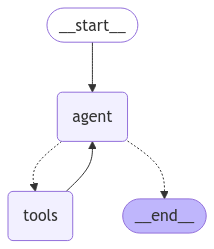

In [ ]:
from langchain_core.messages import HumanMessage
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI

chatgpt = ChatOpenAI(model="gpt-4o", temperature=0)

financial_analyst = create_react_agent(model=chatgpt,
                                       tools=tools,
                                       state_modifier=SYS_PROMPT)
financial_analyst

## Test Financial Analyst ReAct Agent

In [ ]:
from IPython.display import display, Markdown

for event in financial_analyst.stream(
    {"messages": [HumanMessage(content="Tell me some stocks I could potentially invest in")]},
    stream_mode='values' #returns full agent state with all messages including updates
):
    event["messages"][-1].pretty_print()

print('\n\nFinal Response:\n')
display(Markdown(event["messages"][-1].content))

================================ Human Message =================================

Tell me some stocks I could potentially invest in
================================== Ai Message ==================================
Tool Calls:
  get_general_market_data (call_xbPM07w9Wt0T9JuzforEOkkw)
 Call ID: call_xbPM07w9Wt0T9JuzforEOkkw
  Args:
================================= Tool Message =================================
Name: get_general_market_data

Here's some detailed information of the stock market which includes most actively traded stocks, gainers and losers:

Most actively traded stocks:

|    | symbol   | name                          |   price |     change |   percent_change |    volume |    open |    high |     low |   previous_close |     ma50 |     ma200 |   year_high |   year_low |   market_cap |   shares_outstanding |   book_value |   price_to_book |   eps_ttm |   eps_forward |   pe_forward |   dividend_yield | exchange   | exchange_timezone   | earnings_date             | currency  

Here are some stocks that are currently active in the market and might be worth considering for investment. Please remember to conduct your own research and consider your financial situation before making any investment decisions.

### Most Actively Traded Stocks
1. **NVIDIA Corporation (NVDA)**
   - Price: \$147.07
   - Change: +\$6.24 (4.43%)
   - Market Cap: \$3.60 Trillion

2. **Rigetti Computing, Inc. (RGTI)**
   - Price: \$13.91
   - Change: -\$0.07 (-0.50%)
   - Market Cap: \$3.90 Billion

3. **Lucid Group, Inc. (LCID)**
   - Price: \$2.67
   - Change: -\$0.19 (-6.64%)
   - Market Cap: \$8.04 Billion

4. **Palantir Technologies Inc. (PLTR)**
   - Price: \$76.87
   - Change: +\$3.80 (5.20%)
   - Market Cap: \$175.11 Billion

5. **Ford Motor Company (F)**
   - Price: \$10.03
   - Change: -\$0.40 (-3.84%)
   - Market Cap: \$39.86 Billion

### Top Price Gainers
1. **Arm Holdings plc (ARM)**
   - Price: \$179.93
   - Change: +\$24.73 (15.93%)
   - Market Cap: \$189.11 Billion

2. **IES Holdings, Inc. (IESC)**
   - Price: \$316.26
   - Change: +\$39.94 (14.45%)
   - Market Cap: \$6.33 Billion

3. **Disco Corp. (DSCSY)**
   - Price: \$34.23
   - Change: +\$3.76 (12.34%)
   - Market Cap: \$37.09 Billion

### Top Price Losers
1. **Celsius Holdings, Inc. (CELH)**
   - Price: \$25.35
   - Change: -\$1.46 (-5.45%)
   - Market Cap: \$5.96 Billion

2. **Comerica Incorporated (CMA)**
   - Price: \$62.69
   - Change: -\$3.69 (-5.56%)
   - Market Cap: \$8.24 Billion

3. **Trump Media & Technology Group (DJT)**
   - Price: \$33.61
   - Change: -\$1.98 (-5.56%)
   - Market Cap: \$7.29 Billion

These stocks are showing significant activity in the market, either through high trading volumes or notable price changes. Always consider the broader market conditions and your investment strategy when evaluating these options.

In [ ]:
for event in financial_analyst.stream(
    {"messages": [HumanMessage(content="Tell me how is Nvidia doing right now as a company and could I potentially invest in it?")]},
    stream_mode='values' #returns full agent state with all messages including updates
):
    event["messages"][-1].pretty_print()

print('\n\nFinal Response:\n')
display(Markdown(event["messages"][-1].content))

================================ Human Message =================================

Tell me how is Nvidia doing right now as a company and could I potentially invest in it?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_HcyoMa2kqv83WNqalf41fySy)
 Call ID: call_HcyoMa2kqv83WNqalf41fySy
  Args:
    stock_name: Nvidia
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name        |     cik |
|---:|:---------|:------------|--------:|
|  0 | NVDA     | NVIDIA CORP | 1045810 |
================================== Ai Message ==================================
Tool Calls:
  get_stock_price_metrics (call_wUQfxVajjtR2YicDvUmAlR1H)
 Call ID: call_wUQfxVajjtR2YicDvUmAlR1H
  Args:
    stock_ticker: NVDA
  get_stock_fundamental_indicator_metrics (call_TMdg6dM33GvoOtwNB4PoB0ap)
 Call I

### Current Status of NVIDIA (Ticker: NVDA)

#### Stock Price Metrics
- **Current Price**: \$145.21
- **Change**: +\$6.24 (+4.24%)
- **52-Week High/Low**: \$153.13 / \$58.59
- **Volume**: 237,651,395 shares

#### Fundamental Indicators
- **Market Cap**: \$3.60 trillion
- **PE Ratio**: 58.13
- **Forward PE**: 33.09
- **PEG Ratio**: 1.05
- **Gross Margin**: 75.98%
- **Operating Margin**: 62.06%
- **Profit Margin**: 55.04%
- **Return on Equity**: 123.77%

#### Recent News Highlights
- **NVIDIA Expands AI Capabilities**: NVIDIA has been actively expanding its AI capabilities, launching new AI foundation models and platforms.
- **Partnerships and Innovations**: Collaborations with industry leaders in genomics, drug discovery, and autonomous vehicles.
- **Financial Investigations**: There are ongoing fraud investigations involving NVIDIA, which investors should be aware of.

### Investment Considerations
NVIDIA is a leading player in the AI and semiconductor industry, with strong financial metrics and a significant market presence. The company is actively involved in cutting-edge technology and partnerships, which could drive future growth. However, potential investors should consider the high PE ratio, indicating that the stock may be overvalued compared to its earnings. Additionally, the ongoing investigations could pose risks.

### Recommendation
While NVIDIA shows promising growth potential, it's essential to conduct thorough research and consider market conditions and personal investment goals before making any investment decisions.

In [ ]:
def call_financial_analyst_agent(query, verbose=False):

    for event in financial_analyst.stream(
        {"messages": [HumanMessage(content=query)]},
        stream_mode='values' #returns full agent state with all messages including updates
    ):
        if verbose:
            event["messages"][-1].pretty_print()

    print('\n\nFinal Response:\n')
    display(Markdown(event["messages"][-1].content))

In [ ]:
call_financial_analyst_agent(query="Do a comparative analysis between Nvidia and Intel and recommend which one to buy or avoid?",
                             verbose=True)

================================ Human Message =================================

Do a comparative analysis between Nvidia and Intel and recommend which one to buy or avoid?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_S7SnJKi3H62ZqMfSySlX6sft)
 Call ID: call_S7SnJKi3H62ZqMfSySlX6sft
  Args:
    stock_name: Nvidia
  get_stock_ticker_symbol (call_hPbcD2dVri4wl1jcnIedCSRA)
 Call ID: call_hPbcD2dVri4wl1jcnIedCSRA
  Args:
    stock_name: Intel
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name                                                           |     cik |
|---:|:---------|:---------------------------------------------------------------|--------:|
|  0 | INTC     | INTEL CORP                                                     |   50863 |
|  1 | CCCS     | C

Here's a comparative analysis between Nvidia (NVDA) and Intel (INTC) based on the latest available data:

### Nvidia (NVDA)
- **Current Price**: \$145.21
- **Market Cap**: \$3.60 trillion
- **PE Ratio**: 58.13
- **Forward PE**: 33.09
- **PEG Ratio**: 1.05
- **Revenue Growth**: 22.4%
- **Profit Margin**: 55.04%
- **Return on Equity**: 123.77%
- **Dividend Yield**: 0.03%
- **Price to Book Ratio**: 84.33
- **Price to Sales Ratio**: 25.32
- **Beta**: 1.657 (indicating higher volatility compared to the market)

### Intel (INTC)
- **Current Price**: \$21.80
- **Market Cap**: \$94.28 billion
- **Forward PE**: 22.84
- **PEG Ratio**: 0.65
- **Revenue Growth**: -6.2%
- **Profit Margin**: -29.42%
- **Return on Equity**: -15.60%
- **Dividend Yield**: 2.24%
- **Price to Book Ratio**: 0.95
- **Price to Sales Ratio**: 3.88
- **Beta**: 1.026 (indicating moderate volatility compared to the market)

### Analysis
- **Growth Potential**: Nvidia shows strong growth potential with a high market cap, significant revenue growth, and a high return on equity. However, it is trading at a high valuation with a PE ratio of 58.13.
- **Value and Stability**: Intel, on the other hand, is trading at a lower valuation with a forward PE of 22.84 and a PEG ratio of 0.65, indicating it might be undervalued. However, it is currently experiencing negative revenue growth and profit margins, which could be a concern for investors looking for stability.

### Recommendation
- **Nvidia (NVDA)**: If you are looking for growth and are willing to pay a premium for a company with strong growth metrics and high market potential, Nvidia could be a suitable choice. However, be mindful of its high valuation.
- **Intel (INTC)**: If you are looking for a value play with a higher dividend yield, Intel might be worth considering. However, the negative growth and profit margins are significant risks that should be carefully evaluated.

**Conclusion**: Both stocks have their pros and cons. Nvidia is a growth stock with high potential but comes with a high price tag, while Intel offers value and dividends but faces challenges in growth and profitability. It's essential to align your investment choice with your risk tolerance and investment goals. Always consider doing further research or consulting with a financial advisor before making investment decisions.

In [ ]:
call_financial_analyst_agent(query="Is Intel having any issues of late, could it still be a good buy?",
                    verbose=True)

================================ Human Message =================================

Is Intel having any issues of late, could it still be a good buy?
================================== Ai Message ==================================
Tool Calls:
  get_stock_ticker_symbol (call_X08MjnVRZ5D9aTUNg4wJqz7o)
 Call ID: call_X08MjnVRZ5D9aTUNg4wJqz7o
  Args:
    stock_name: Intel
================================= Tool Message =================================
Name: get_stock_ticker_symbol

Here are the details of the company and its stock ticker symbol:

|    | symbol   | name                                                           |     cik |
|---:|:---------|:---------------------------------------------------------------|--------:|
|  0 | INTC     | INTEL CORP                                                     |   50863 |
|  1 | CCCS     | CCC Intelligent Solutions Holdings Inc.                        | 1818201 |
|  2 | ZK       | ZEEKR Intelligent Technology Holding Ltd                       

Intel Corporation (INTC) has been facing some challenges recently, as reflected in its stock performance and news headlines. Here's a detailed overview:

### Stock Performance
- **Current Price**: \$21.86
- **52-Week High/Low**: \$50.30 / \$18.51
- **Recent Performance**: The stock has seen a decline of approximately 54.6% over the past year.
- **Volatility**: The stock has shown some volatility with a weekly volatility of 3.26% and a monthly volatility of 3.15%.

### Fundamental Indicators
- **Market Cap**: \$94.28 billion
- **Forward P/E Ratio**: 22.84
- **Profit Margin**: -29.42%
- **Return on Equity**: -15.60%
- **Debt to Equity Ratio**: 47.91%

### Recent News
Intel has been involved in several legal issues, including class action lawsuits related to securities fraud. Additionally, the company has announced a \$10 billion cost reduction plan to increase efficiency and market competitiveness. There have been collaborations with companies like AWS and Karma Automotive, and Intel has been active in AI and chip manufacturing advancements.

### Considerations
- **Legal Challenges**: The ongoing lawsuits could impact investor sentiment and the company's financials.
- **Financial Performance**: The negative profit margin and return on equity indicate financial struggles.
- **Strategic Initiatives**: Intel's cost reduction plan and collaborations may provide long-term growth opportunities.

### Conclusion
Intel is currently facing significant challenges, including legal issues and financial underperformance. However, its strategic initiatives and collaborations could offer potential growth opportunities. As always, it's crucial to conduct thorough research and consider your risk tolerance before making any investment decisions.

In [ ]:
call_financial_analyst_agent(query="Give me the Market Cap, PE Ratio, Revenue per share for Microsoft",
                             verbose=False)



Final Response:



Here are the requested financial metrics for Microsoft (symbol: MSFT):

- **Market Capitalization**: \$3.317 trillion
- **PE Ratio**: 36.91
- **Revenue per Share**: \$34.20

These figures provide a snapshot of Microsoft's financial standing, with a substantial market cap indicating its size and influence in the market. The PE ratio gives insight into the company's valuation relative to its earnings, and the revenue per share reflects its revenue generation on a per-share basis. Always consider these metrics in the context of broader market conditions and your investment strategy.

In [ ]:
call_financial_analyst_agent(query="Do a price analysis for Apple and give me some insights from it",
                             verbose=False)



Final Response:



Here's a detailed price analysis for Apple Inc. (AAPL):

### Current Price Metrics
- **Last Price:** \$223.18
- **Bid:** \$223.15
- **Ask:** \$223.25
- **Open:** \$219.90
- **High:** \$224.12
- **Low:** \$219.79
- **Close:** \$223.83
- **Volume:** 64,126,500 shares

### Price Performance
- **1-Day Change:** +0.53%
- **1-Week Change:** -4.05%
- **1-Month Change:** -9.76%
- **3-Month Change:** -4.75%
- **6-Month Change:** -0.06%
- **Year-to-Date Change:** -10.62%
- **1-Year Change:** +16.85%

### Volatility
- **Weekly Volatility:** 2.45%
- **Monthly Volatility:** 1.98%

### Historical Price Highlights
- **52-Week High:** \$260.10
- **52-Week Low:** \$164.07

### Insights
- **Recent Trends:** Apple has experienced a decline over the past month, with a 9.76% drop. However, over the past year, the stock has gained 16.85%, indicating a strong long-term performance.
- **Volatility:** The stock shows moderate volatility, with a weekly volatility of 2.45% and a monthly volatility of 1.98%.
- **Volume:** The current trading volume is higher than the average, indicating increased trading activity.

### Analyst Score
- **Analyst Score:** 2.14 (on a scale where lower is better)

### Conclusion
Apple's stock has shown resilience over the long term, despite recent short-term declines. The current price is closer to the lower end of its 52-week range, which might present an opportunity for investors looking for long-term growth. However, the recent volatility and downward trend should be considered carefully.

Please ensure to conduct your own research or consult with a financial advisor before making any investment decisions.